In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats # scipy.stats is a sub-module of the SciPy library that provides a large number of statistical functions and probability distributions. It allows users to perform a wide range of statistical analyses, including hypothesis testing, regression analysis, and probability distributions.,In addition to probability distributions, scipy.stats also provides a number of statistical functions such as correlation coefficient, t-test, chi-squared test, and many more. These functions are useful for analyzing data and drawing conclusions about underlying populations.
import seaborn as sns
import pylab # pylab is a module in Python that provides a convenient interface for creating plots and visualizations. It is actually a combination of two popular Python modules: matplotlib and numpy, and is designed to provide a similar experience to that of MATLAB. When you import pylab, you have access to the functions and objects from both numpy and matplotlib in a single namespace. This makes it easy to create plots and visualizations using a simple and intuitive syntax. For example, you can use the plot function from pylab to create a line plot of some data. You can also use functions like scatter, hist, imshow, and contour to create a variety of different types of plots. pylab also provides a number of other useful functions for manipulating arrays and performing mathematical operations. For example, you can use functions like mean, std, and max to calculate various statistics on arrays. Overall, pylab is a powerful tool for creating plots and visualizations in Python and is widely used in scientific computing, data analysis, and machine learning. However, it should be noted that pylab has been deprecated in favor of using matplotlib.pyplot and numpy separately, as this allows for greater flexibility and avoids potential namespace conflicts.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style='darkgrid',font_scale=1.5) # sns.set(style='darkgrid',font_scale=1.5) sets the style of the plots created by seaborn to "darkgrid" and scales the font size of the plot elements by a factor of 1.5. seaborn is a popular Python library for creating statistical visualizations and is built on top of matplotlib.
pd.set_option("display.max.columns",None) # pd.set_option("display.max.columns",None) and pd.set_option("display.max.rows",None) are used to set the maximum number of displayed columns and rows in a pandas DataFrame to unlimited. pandas is a powerful data manipulation library in Python and is widely used for data analysis and data science tasks. By default, pandas limits the number of displayed columns and rows in a DataFrame for readability, but these options can be changed as needed. Overall, these lines of code help to set up the environment for creating visualizations and working with data in Python by setting some useful default options.
pd.set_option("display.max.rows",None)

## Loading the Datasets

In [2]:
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## Basic Understanding of the Data

#### 1. Checking dimension of the data

In [5]:
df.shape

(205, 26)

### Observation

From the above output we can say that there are 205 rows/records and 26 columns/Features present in our dataset.

### 2. Checking the basic information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Observation

1. From above output we can observe that 10 categorical & 16 numerical Attributes.
2. All the features are having correct data-types. So we don't have to do any changes.

## 3.Descriptive 	Statistics Analysis

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 3. Checking NaN values in our Dataset.

In [8]:
df.isnull().sum().to_frame().rename(columns={0:'TOTAL NO OF MISSING VALUES'})

,TOTAL NO OF MISSING VALUES
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


### Observation

We can observe that none of the features is having Missing values.

### 4.Checking the Duplicate values

In [9]:
print("Duplicate values =",df.duplicated().sum())

Duplicate values = 0


### Observation

From the above output we can say that there is no duplicate records present in our dataset.

### 5. Showing the categorical features

In [10]:
df.select_dtypes(include='object').head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### 6. Showing only the Numerical Features.

In [11]:
df.select_dtypes(include=['int','float']).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning

1. Cleaning the CarName Feature

In [12]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Observation

1. In the CarName Feature we can observe that the values are storing both the car's company name and the Car name.
2. So we have to clean that Feature.
3. We can separate the car company names from Carname Feature.

In [13]:
Company_Name = df['CarName'].apply(lambda x: x.split(" ")[0]) # Company_Name = df['CarName'].apply(lambda x: x.split(" ")[0]) explain me This line of code creates a new column in a pandas DataFrame called Company_Name by extracting the first word from each value in the "CarName" column and assigning it to the new column. Here's a step-by-step explanation of what the code does: df['CarName'] selects the "CarName" column from the DataFrame df. apply(lambda x: x.split(" ")[0]) applies a lambda function to each value in the "CarName" column. The lambda function splits each value into a list of words using the space character as a delimiter (x.split(" ")) and then selects the first word in the resulting list ([0]). This effectively extracts the first word from each value in the "CarName" column. The resulting Series of first words is assigned to a new column called "Company_Name" in the DataFrame using the syntax Company_Name = df['CarName'].apply(lambda x: x.split(" ")[0]).
df.insert(2,"CompanyName",Company_Name) # # by using insert function we are inserting the newly created column which contains values of company names so here 2 means we are giving the index postion for inserting the CompanyName in the data frame
# Now we can drop the CarName Feature.
df.drop(columns=['CarName'],inplace=True)  # # inplace= True means it help us to make changes of of the data frame if we type inplace=True                       

In [14]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 2. Checking the Unique Car Company Names.

In [15]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Observation 
There seems to be some spelling error in the CompanyName column.

1. maxda = mazda
2. Nissan = nissan
3. porsche = porcshce
4. toyota = toyouta
5. vokswagen = volkswagen = vw

So we have to replace those incorrect car company names wit correct company's name.

###  3. Creating a Function to Replace the Values.

In [16]:
# The given code defines a function called replace that takes two arguments a and b. The function is used to replace certain misspelled or alternative names of car companies in a DataFrame column called "CompanyName" with their correct names. The function uses the replace method of the "CompanyName" column in the DataFrame to replace the values specified in the a argument with the values specified in the b argument. The inplace=True argument ensures that the changes are made directly to the DataFrame. The function is called multiple times with different values to replace the following misspelled or alternative names: 'maxda' is replaced with 'mazda' 'porcshce' is replaced with 'porsche' 'toyouta' is replaced with 'toyota' 'vokswagen' is replaced with 'volkswagen' 'vw' is replaced with 'volkswagen' Overall, this code is useful for standardizing the names of car companies in a DataFrame and can help to ensure consistency in analysis and visualization.
def replace(a,b):
    df['CompanyName'].replace(a,b,inplace=True)
    replace('maxda','mazda')
    replace('porcshce','porsche')
    replace('toyouta','toyota')
    replace('vokswagen','volkswagen')
    replace('vw','volkswagen')

In [17]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Observation

1. Now all the car company name seems correct.So we don't need to do any more cleaning.
2. Now we can go to next step which is exploratory data analysis.

# Exploratory Data Analysis(EDA)

### 1. Visualizing our Target Feature

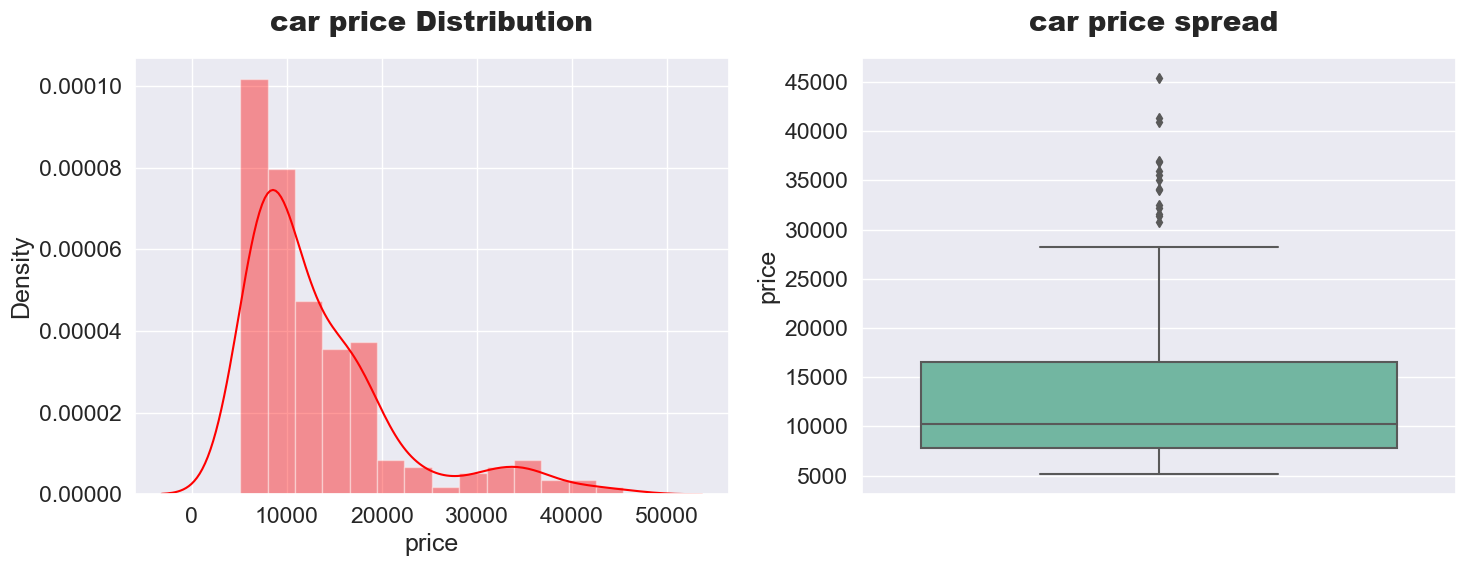

In [18]:
# This code creates a plot using the Matplotlib and Seaborn visualization libraries. The plot is a figure with a size of 15 inches wide by 6 inches high. The figure is divided into a grid of 1 row and 2 columns, and the first subplot is selected for the current plot.  The chosen subplot displays a kernel density estimate (KDE) plot of the "price" column of a DataFrame called "df". The KDE plot is overlaid on a histogram of the same data, which shows the distribution of car prices in the dataset. The color of the histogram and KDE curve is set to red using the "color" parameter.  The next line sets the title of the subplot to "Car Price Distribution", with a font size of 20 and a bold font weight. The "pad" parameter adds some space between the title and the subplot.  Overall, this code is used to visualize the distribution of car prices in a dataset using a histogram with a KDE plot overlaid.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1) # In Matplotlib, a subplot is a way to divide a figure into multiple smaller plots, allowing you to display multiple plots within the same figure. The plt.subplot() function is used to create subplots within a figure. It takes three arguments: the number of rows in the grid, the number of columns in the grid, and the index of the current subplot, which ranges from 1 to the total number of subplots in the grid. For example, plt.subplot(2, 2, 1) creates a grid with 2 rows and 2 columns, and selects the first (top-left) subplot for the current plot. plt.subplot(1, 2, 2) creates a grid with 1 row and 2 columns, and selects the second (right) subplot for the current plot. Once a subplot has been created, you can use other Matplotlib functions such as plt.plot() and plt.scatter() to create the actual plot within the subplot. You can also set various properties of the subplot, such as the title, axis labels, and legend, using functions such as plt.title(), plt.xlabel(), and plt.legend(). Subplots are useful for comparing multiple plots side by side, or for displaying different views of the same data within the same figure. They also allow you to save space by combining multiple plots into a single figure.
sns.distplot(df["price"],color='red',kde=True) # The chosen subplot displays a kernel density estimate (KDE) plot of the "price" column of a DataFrame called "df". The KDE plot is overlaid on a histogram of the same data, which shows the distribution of car prices in the dataset. The color of the histogram and KDE curve is set to red using the "color" parameter.
plt.title("car price Distribution",fontweight="black",pad=20,fontsize=20) # The next line sets the title of the subplot to "Car Price Distribution", with a font size of 20 and a bold font weight. The "pad" parameter adds some space between the title and the subplot.

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("car price spread ",fontweight='black',pad=20,fontsize=20)
plt.tight_layout() # plt.tight_layout() is a function in Matplotlib that adjusts the spacing between subplots to improve their appearance and readability. It automatically adjusts the size of the figure and the padding between subplots to ensure that all elements are visible and that there is no overlap or crowding. When you create a figure with multiple subplots using the plt.subplots() function, there may be some overlap or whitespace between each subplot, depending on the size of the figure and the size of the subplots. This can make the figure look unbalanced or cluttered. plt.tight_layout() solves this problem by automatically adjusting the spacing between subplots. It calculates the necessary padding based on the size and position of each subplot, and adjusts the figure size and/or subplot sizes as needed to achieve a balanced layout.
plt.show()

## subplot( )
In Matplotlib, a subplot is a way to divide a figure into multiple smaller plots, allowing you to display multiple plots within the same figure.

The plt.subplot() function is used to create subplots within a figure. It takes three arguments: the number of rows in the grid, the number of columns in the grid, and the index of the current subplot, which ranges from 1 to the total number of subplots in the grid.

For example, plt.subplot(2, 2, 1) creates a grid with 2 rows and 2 columns, and selects the first (top-left) subplot for the current plot. plt.subplot(1, 2, 2) creates a grid with 1 row and 2 columns, and selects the second (right) subplot for the current plot.

Once a subplot has been created, you can use other Matplotlib functions such as plt.plot() and plt.scatter() to create the actual plot within the subplot. You can also set various properties of the subplot, such as the title, axis labels, and legend, using functions such as plt.title(), plt.xlabel(), and plt.legend().

Subplots are useful for comparing multiple plots side by side, or for displaying different views of the same data within the same figure. They also allow you to save space by combining multiple plots into a single figure.




### KDE plot
1. A KDE (Kernel Density Estimate) plot is a non-parametric way to estimate the probability density function of a continuous random variable. It is a way to visualize the distribution of a dataset, similar to a histogram, but with a smoother curve that can reveal more detail about the shape of the distribution.

2. In a KDE plot, a smoothing kernel is placed at each data point, and the kernel densities are summed to create a continuous curve that estimates the probability density function of the data. The bandwidth of the kernel determines the width of the curve and hence the degree of smoothing.

3. KDE plots are useful for exploring the shape of a distribution, identifying any skewness or multimodality, and detecting outliers. They can also be used to compare multiple distributions side by side.

4. In Seaborn, the sns.kdeplot() function is used to create KDE plots. By default, it plots a univariate KDE of a single variable, but it can also be used to plot bivariate KDEs of two variables. The sns.distplot() function, which is used in the code you provided, is a higher-level function that combines a histogram and a KDE plot, allowing you to visualize both the distribution of the data and the smooth estimate of the density function in a single plot.

### PDA (Probability Distribution Function)
1. In probability theory, a probability density function (PDF) is a function that describes the probability distribution of a continuous random variable. It is a non-negative function that integrates to 1 over its support, which is the range of possible values of the variable.

2. The PDF of a continuous random variable can be visualized as a curve that represents the relative likelihood of observing different values of the variable. The area under the curve between any two points represents the probability of observing a value between those two points.

3. PDFs are used to model and analyze the behavior of continuous random variables, such as the height or weight of a population, the temperature or rainfall in a region, or the stock price of a company. They can help us understand the distribution of the data, identify the most likely values, and calculate probabilities of different outcomes.

4. The PDF of a continuous random variable can be estimated from a sample of data using various methods, such as the kernel density estimation (KDE) method or the histogram method. These methods produce an estimate of the PDF that approximates the true underlying distribution of the data.

5. The PDF is an important concept in statistics and probability theory, and is used in many applications, such as hypothesis testing, statistical inference, and machine learning.

In [19]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T# This code creates a summary of statistical measures for the "price" column of a DataFrame called "df". The .agg() method is used to apply multiple aggregation functions to the "price" column, including "min", "mean", "median", "max", "std", and "skew". These functions compute the minimum, mean, median, maximum, standard deviation, and skewness of the data, respectively. The result of the aggregation is a Pandas Series object with the function names as index labels. The .to_frame() method is then used to convert the Series object to a DataFrame, so that it can be transposed using the .T attribute. This produces a DataFrame with one row and six columns, where each column represents one of the aggregation functions applied to the "price" column. The resulting DataFrame contains the following information: "min": the smallest value in the "price" column "mean": the average value of the "price" column "median": the middle value of the "price" column "max": the largest value in the "price" column "std": the standard deviation of the "price" column "skew": a measure of the asymmetry of the "price" column distribution. A positive skewness value indicates a right-skewed distribution, while a negative skewness value indicates a left-skewed distribution. This summary of statistical measures can help provide a quick overview of the distribution of car prices in the dataset, and can be used to compare different subsets of the data or to identify potential outliers.

,min,mean,median,max,std,skew
price,5118.0,13276.710571,10295.0,45400.0,7988.852332,1.777678


### Insights

1. We can clearly observe that our Car Price Feature is Right Skewed.
2. We can clearly observe that there is a significant difference between mean & median value.
1. Ans The mean and median are both measures of central tendency, but they can give different information about a dataset. The mean is calculated by adding up all the values in a dataset and dividing by the total number of values. It is affected by outliers, or extreme values, in the dataset. If there are a few values that are much larger or smaller than the rest of the values, the mean can be skewed towards those outliers. The median, on the other hand, is the middle value in a dataset when the values are arranged in order from smallest to largest. It is not affected by outliers as much as the mean, because it only depends on the values in the middle of the dataset. If the mean and median are significantly different, it suggests that the dataset is not evenly distributed. For example, if there are a few very large values in the dataset, the mean will be larger than the median. Conversely, if there are a few very small values in the dataset, the mean will be smaller than the median
3. We can also make an insight that most of the car's price is below 14000.
4. We can also that the skewness of the car price is above 1.5 which means that the data points are highly spread.

### 2. Visualizing Total No. of cars sold by different company


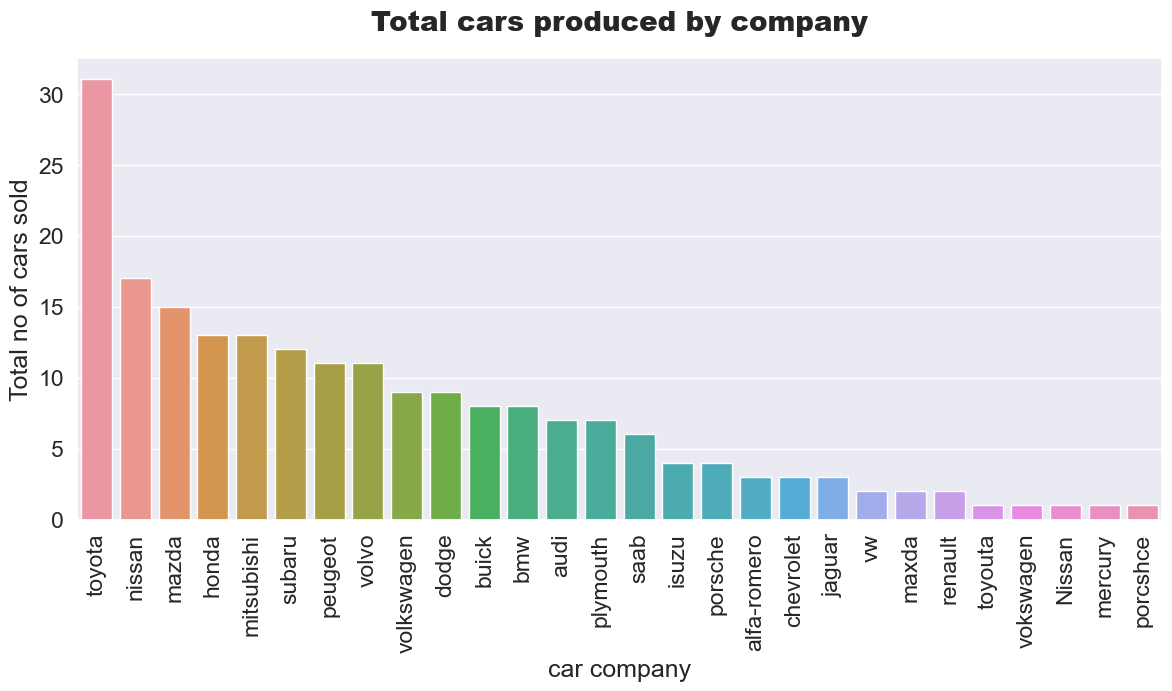

In [20]:
plt.figure(figsize=(14,6))
counts=df["CompanyName"].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel("car company")
plt.ylabel("Total no of cars sold")
plt.title("Total cars produced by company",pad=20,fontweight="black",fontsize=20)
plt.xticks(rotation=90) # with the help of x ticks i can able to rotate the index values of x axis which are car company names so then we can easily read the names of car company names  
plt.show()

In [21]:
counts=df["CompanyName"].value_counts()
counts

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [22]:
df[df["CompanyName"]=="mercury"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [23]:
df[df["CompanyName"]=="Nissan"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
89,90,1,Nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499.0


In [24]:
df[df["CompanyName"]=="renault"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,132,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


### Insights

1. Toyota company has sold the highest number of cars.
2. So we can say that Toyota is kind of customers most favoured company.
3. Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

## 3. Visualizing Car Company w.r.t Price

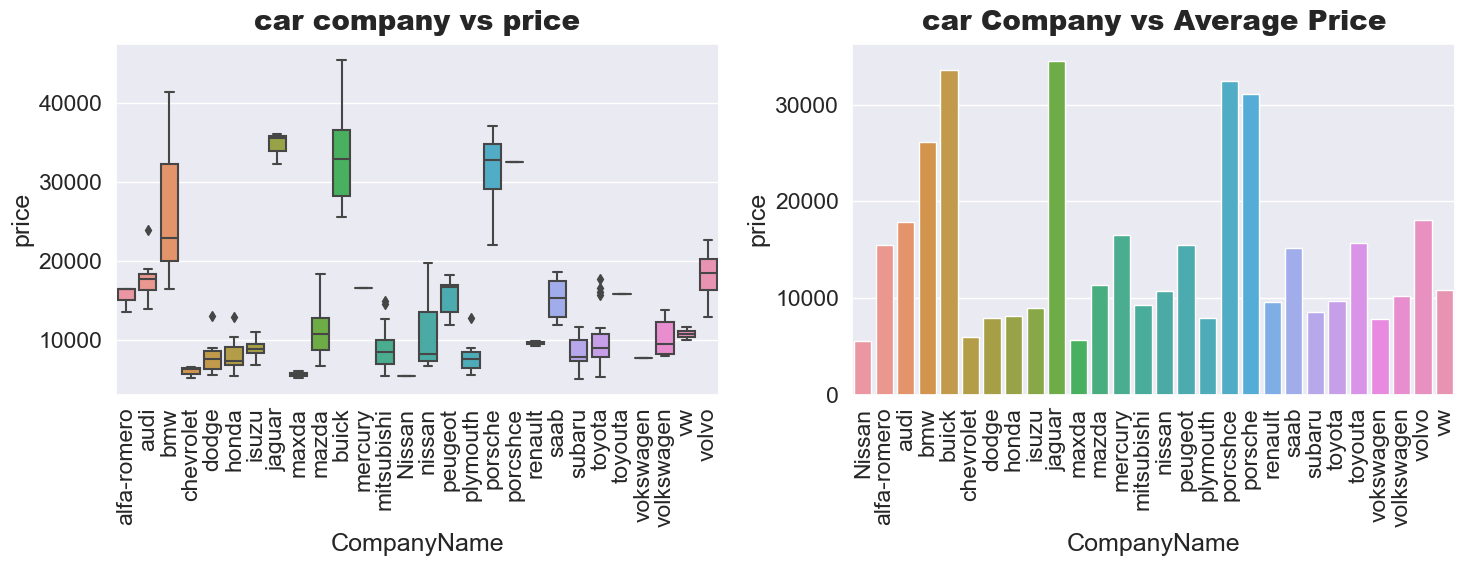

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("car company vs price",pad=10,fontweight="black",fontsize=20)

plt.subplot(1,2,2)
x=pd.DataFrame(df.groupby("CompanyName")["price"].mean()) # a group-by operation on a Pandas DataFrame df based on the values in the "CompanyName" column and computes the mean of the "price" column for each group. Here's how this code works: df.groupby("CompanyName") groups the rows of the DataFrame df based on the unique values in the "CompanyName" column. ["price"] selects only the "price" column from the grouped DataFrame. .mean() applies the mean function to each group of the "price" column. pd.DataFrame() creates a new DataFrame from the resulting group-wise means of the "price" column. x = ... assigns the resulting DataFrame to a new variable x. The resulting DataFrame x has two columns: "CompanyName" and "price". The "CompanyName" column contains the unique values from the "CompanyName" column of the original DataFrame df, while the "price" column contains the mean value of the "price" column for each group of "CompanyName". This code can be useful for summarizing the data by computing the means of a particular column (in this case, "price") for different groups defined by another column (in this case, "CompanyName").
sns.barplot(x=x.index,y="price",data=x)
plt.xticks(rotation=90)
plt.title("car Company vs Average Price",pad=10,fontweight="black",fontsize=20)
plt.tight_layout()
plt.show()


In [26]:
x

,price
CompanyName,
Nissan,5499.000000
alfa-romero,15498.333333
audi,17859.166714
bmw,26118.750000
buick,33647.000000
chevrolet,6007.000000
dodge,7875.444444
honda,8184.692308
isuzu,8916.500000


In [27]:
df[df["CompanyName"]=="mercury"] # The code df[df["CompanyName"]=="mercury"] is used to filter the rows of a Pandas DataFrame df based on a condition. Here's how this code works: df["CompanyName"] selects the "CompanyName" column from the DataFrame df. df["CompanyName"]=="mercury" checks for each row of the "CompanyName" column whether it has the value "mercury" or not. This returns a Boolean Series of the same length as the "CompanyName" column, where each element is True if the value in the corresponding row is "mercury" and False otherwise. df[df["CompanyName"]=="mercury"] uses the Boolean Series from step 2 as a filter to select only the rows of the original DataFrame where the value in the "CompanyName" column is equal to "mercury". This filtered DataFrame is then returned as the output. So, the resulting DataFrame contains only the rows where the value in the "CompanyName" column is "mercury". This code can be useful for selecting or filtering specific rows of a DataFrame based on a condition in a particular column.

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [28]:
df[df["CompanyName"]=="Nissan"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
89,90,1,Nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499.0


In [29]:
df[df["CompanyName"]=="renault"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,132,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


### Insights

1. Jaguar & buick seems to have the highest price range cars.
2. Car companies like Nisaan,Renault & Mercury are having only one to two datapoints.
3. So we can't make any inference related to lowest price range car companies.

Note

Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range as Low Range, Medium Range, High Range.

### 4. Visualizing Car Fuel Type Feature

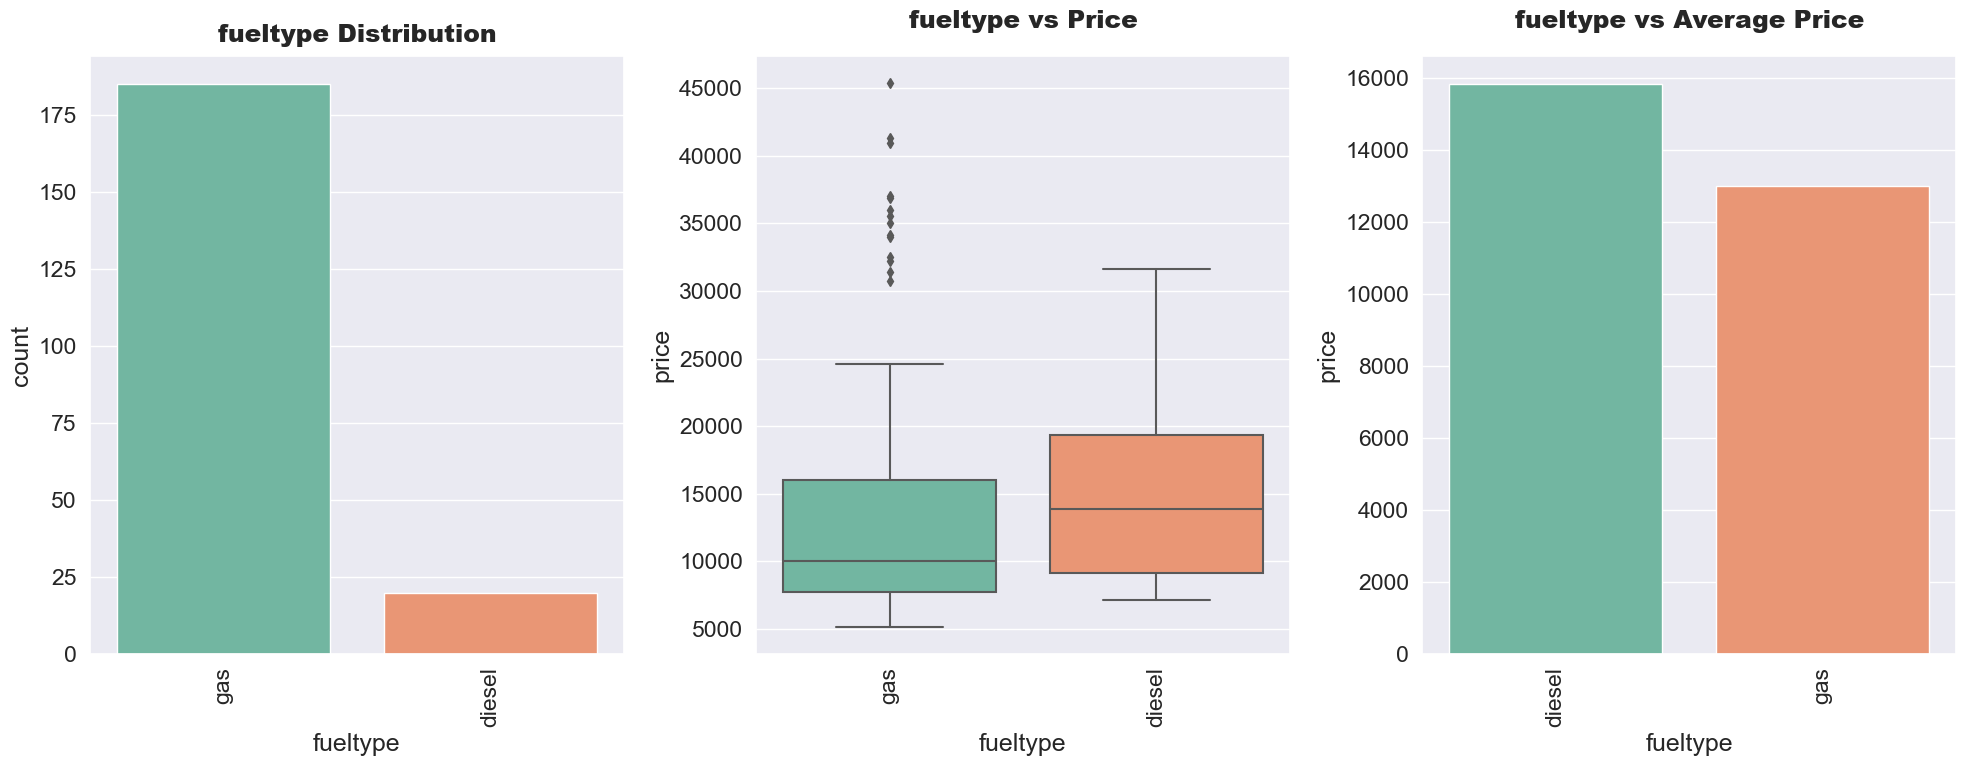

In [30]:
# The code defines a function named categorical_visualization that takes one argument cols. This function generates a set of three visualizations for a categorical variable cols in a Pandas DataFrame df. Here's how this code works: plt.figure(figsize=(20,8)) creates a new figure with a size of 20 inches by 8 inches. plt.subplot(1,3,1) creates the first subplot in a 1x3 grid of subplots. sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index) generates a countplot of the cols variable in the DataFrame df. It visualizes the distribution of the cols variable by counting the number of occurrences of each unique value of cols in the DataFrame. The order parameter sorts the bars in descending order based on the count of each unique value. plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18) sets the title of the first subplot, which describes the distribution of the cols variable. plt.xticks(rotation=90) rotates the x-axis tick labels by 90 degrees for better readability of the variable names. plt.subplot(1,3,2) creates the second subplot in the 1x3 grid of subplots. sns.boxplot(x=cols,y="price",data=df,palette="Set2") generates a boxplot of the price variable in the DataFrame df, grouped by the cols variable. It visualizes the relationship between the cols variable and the price variable, showing the median, quartiles, and outliers of the price variable for each unique value of cols. plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18) sets the title of the second subplot, which describes the relationship between the cols variable and the price variable. plt.xticks(rotation=90) rotates the x-axis tick labels by 90 degrees for better readability of the variable names. plt.subplot(1,3,3) creates the third subplot in the 1x3 grid of subplots. x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False)) calculates the mean price for each unique value of cols in the DataFrame df, and sorts them in descending order. The resulting DataFrame x has two columns: cols and the mean price. sns.barplot(x=x.index,y="price",data=x,palette="Set2") generates a barplot of the mean price for each unique value of cols in the DataFrame df. It visualizes the relationship between the cols variable and the average price of each unique value. plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18) sets the title of the third subplot, which describes the relationship between the cols variable and the average price of each unique value. plt.xticks(rotation=90) rotates the x-axis tick labels by 90 degrees for better readability of the variable names. plt.tight_layout() adjusts the layout of the subplots to prevent overlapping of titles and labels. plt.show() displays the subplots on the screen. Overall, this function is useful for visualizing the distribution of a categorical variable, its relationship with a continuous variable, and the average value of the continuous variable for each unique value of the categorical variable.
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index) # order=df['fueltype'].value_counts().index creates a list of the unique values in the 'fueltype' column of the DataFrame df, sorted in descending order of frequency (i.e., from most to least common). The value_counts() method returns a Series containing counts of unique values in the 'fueltype' column. The index attribute of this Series returns a pandas Index object containing the unique values in the column, sorted in descending order of frequency. By setting order to this index object, the sns.countplot() function will display the bars in the order of frequency, with the most common fueltype at the leftmost side of the plot. For example, if the 'fueltype' column contained 100 rows with 'gas' and 50 rows with 'diesel', then order would be set to ['gas', 'diesel']. This would result in a count plot with the 'gas' bars on the left and the 'diesel' bars on the right, reflecting the relative frequency of each fuel type in the dataset.
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fueltype")

### Insights

1. We can clearly make an inisght that Cars having gas fuel system is mostly sold.
2. From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
3. Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
4. From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.
5. So we can say that customers prefer those cars which consumes less price in fuels.

### 5. Visualizing Aspiration Feature

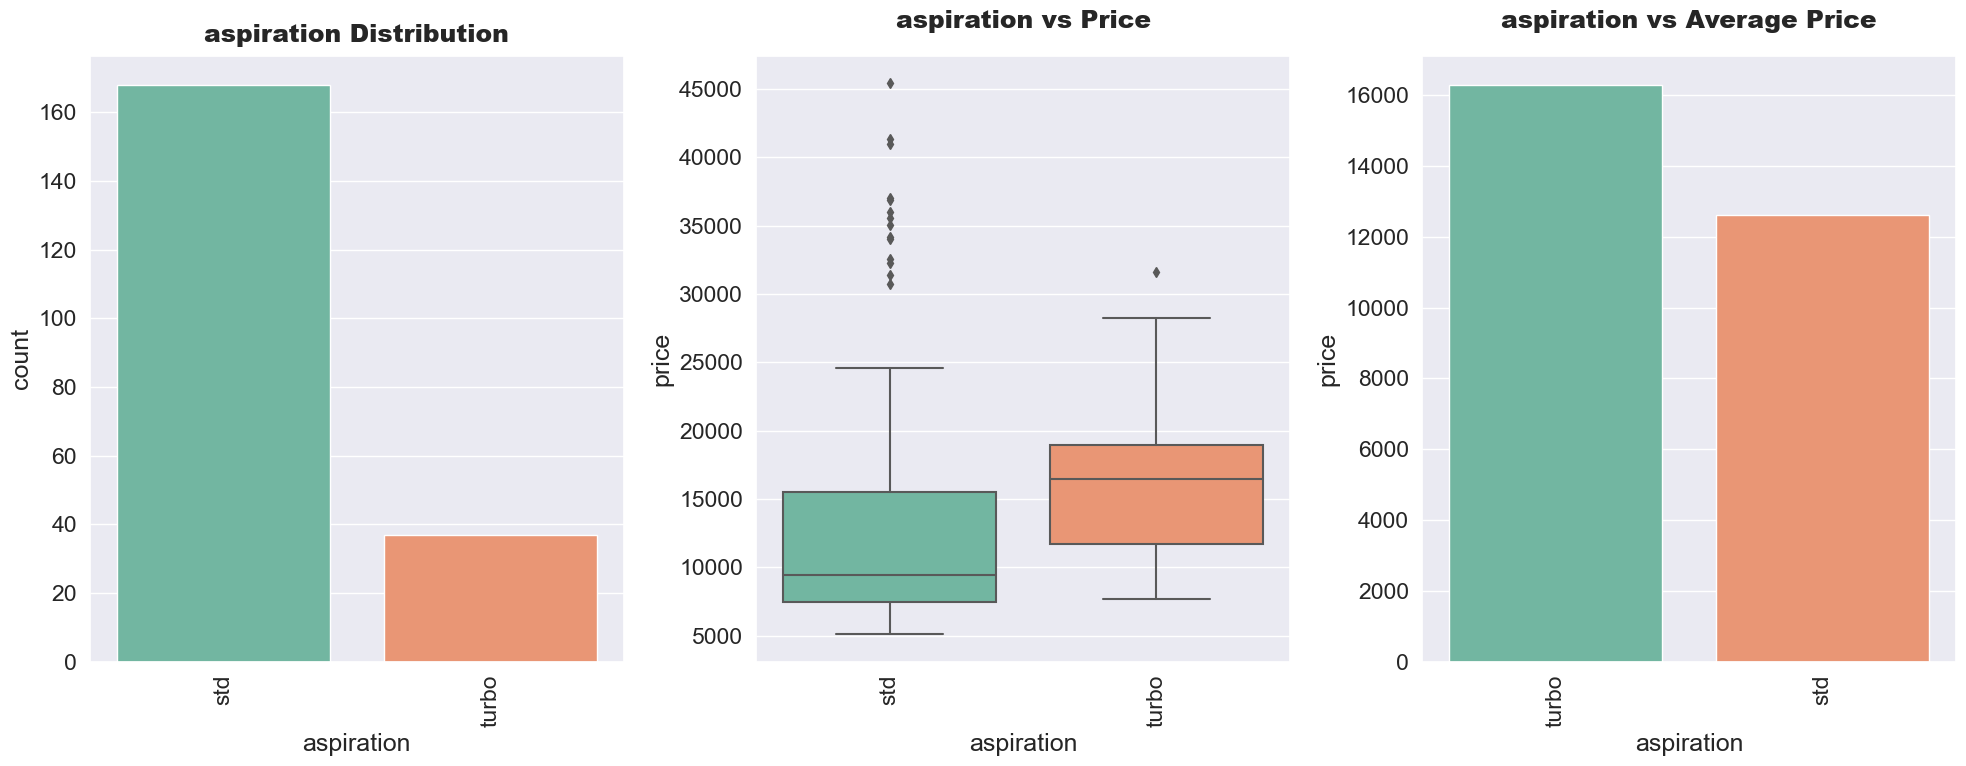

In [31]:
categorical_visualization("aspiration")

### Observation

1. Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
2. Cars having Turbo Aspiration have higher price range than the STD Aspiration.

### Insights

1. Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

### 6. Visualizing Door Nubmer Feature.

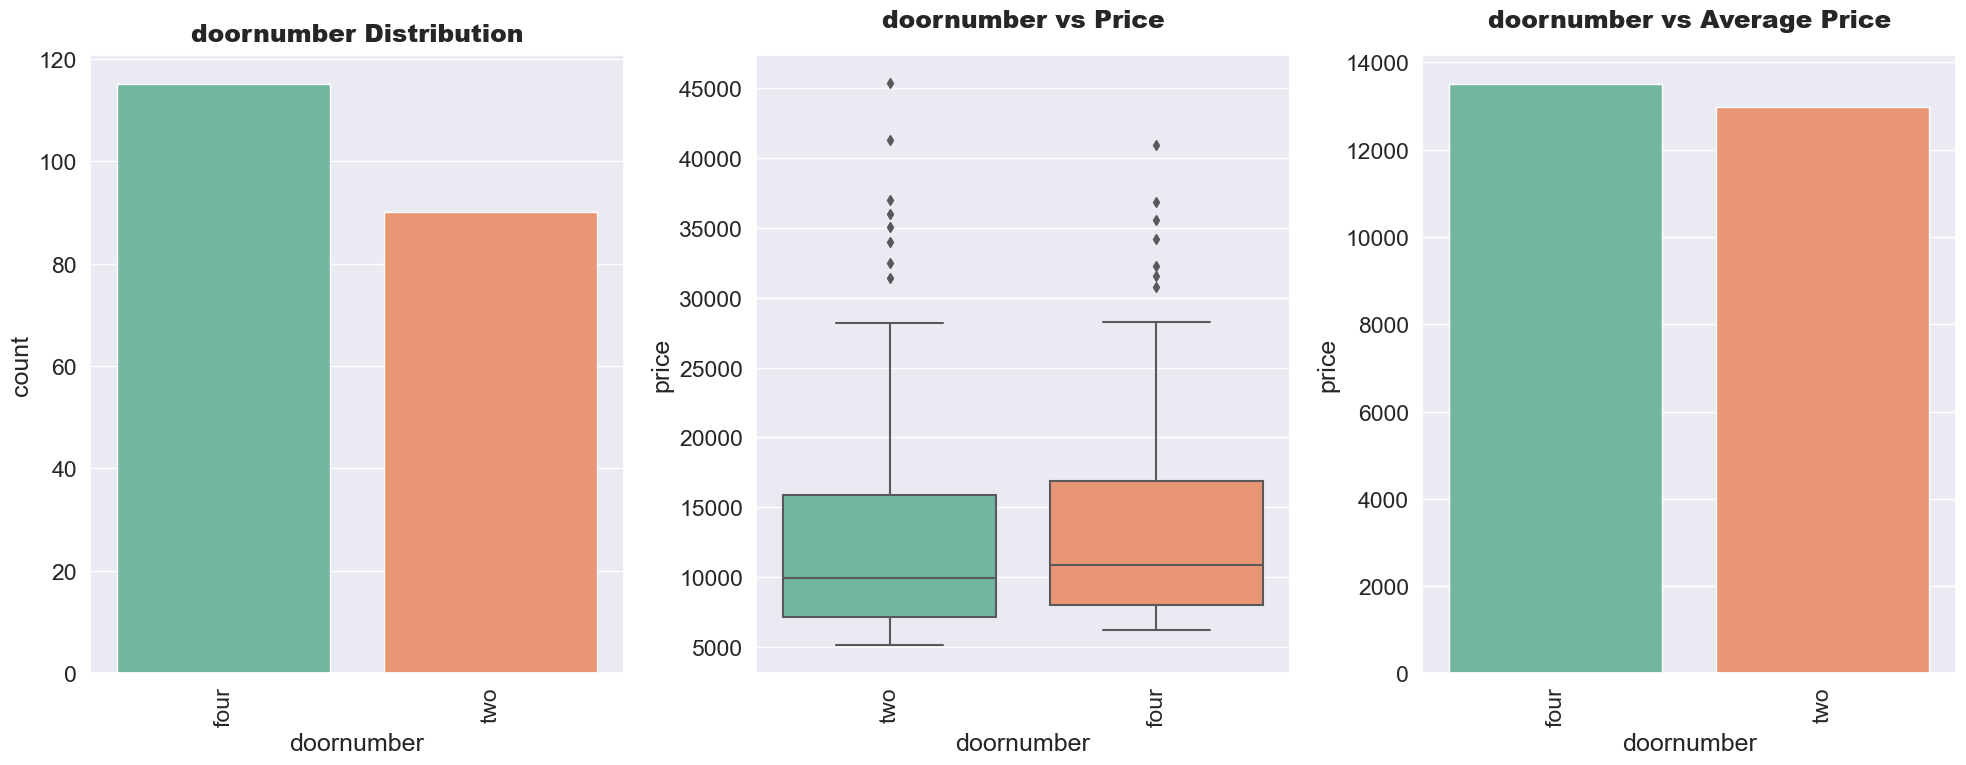

In [32]:
categorical_visualization("doornumber")

### Observation

1. Cars having Four Doors are mostly sold when compared with cars having Two Doors.
2. Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.
### Insights

1. Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..
2. Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors
3. Door numbers category is not affecting the price that much.

### 7. Visualizing Car Body Type Feature.`

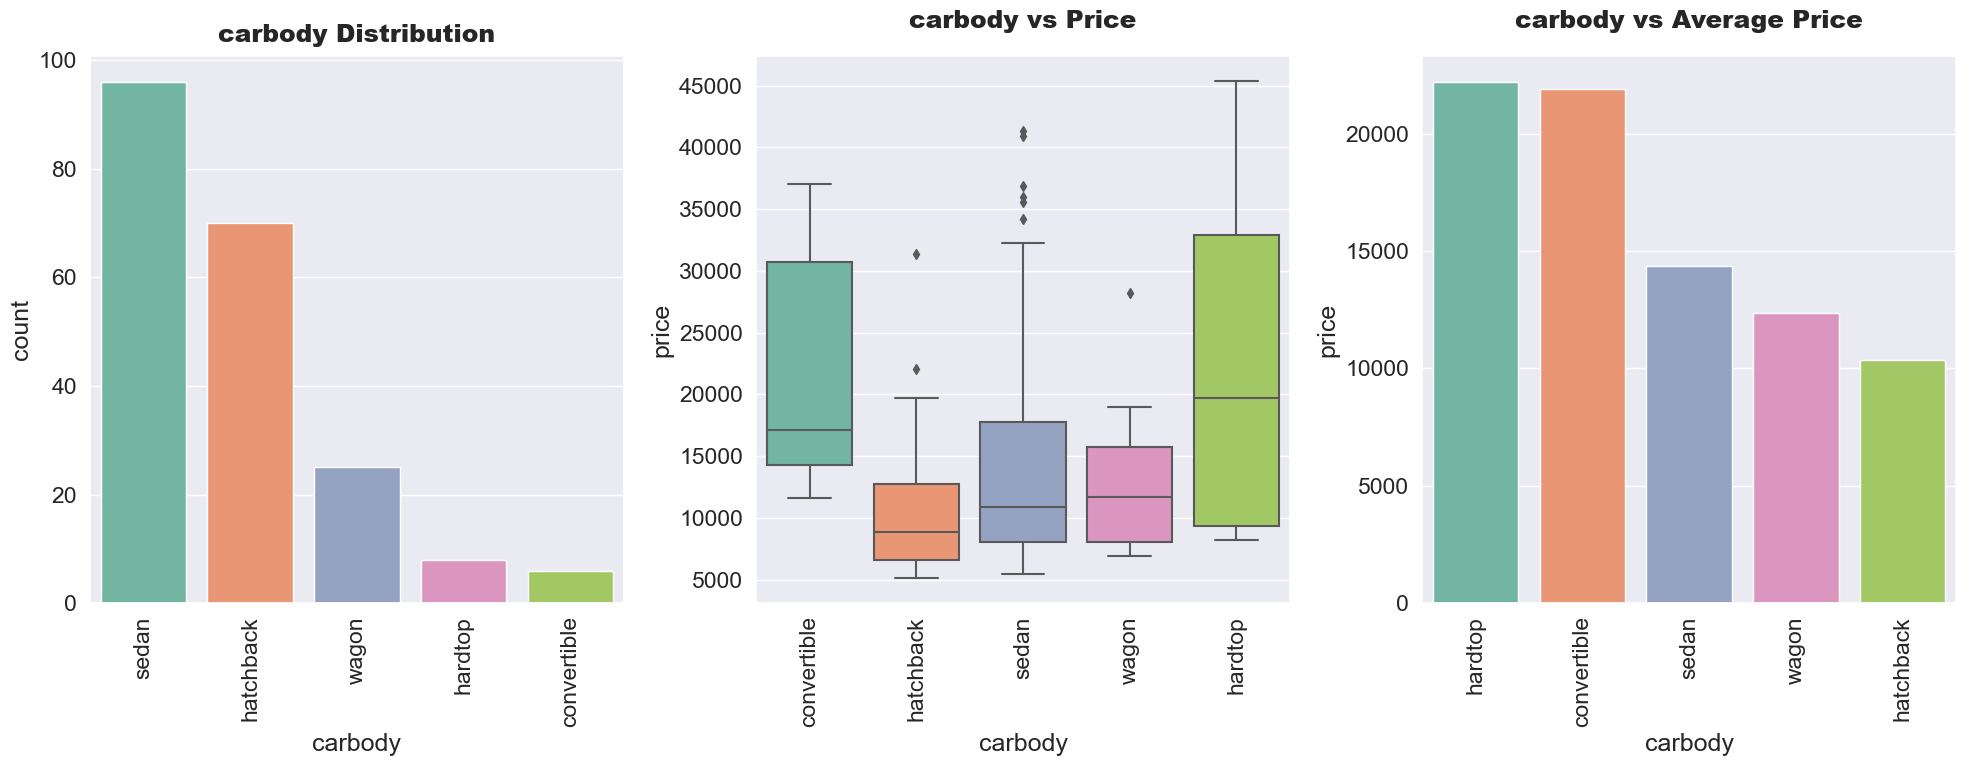

In [33]:
categorical_visualization("carbody")

### Obseravtion

1. Cars having sedan body-type are mostly sold followed by hatchback.
2. Cars having convertible or hardtop body-type are less sold.
3. Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

### Insights

1. Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
2. Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

### 8. Visualizing Drive Wheel Feature.

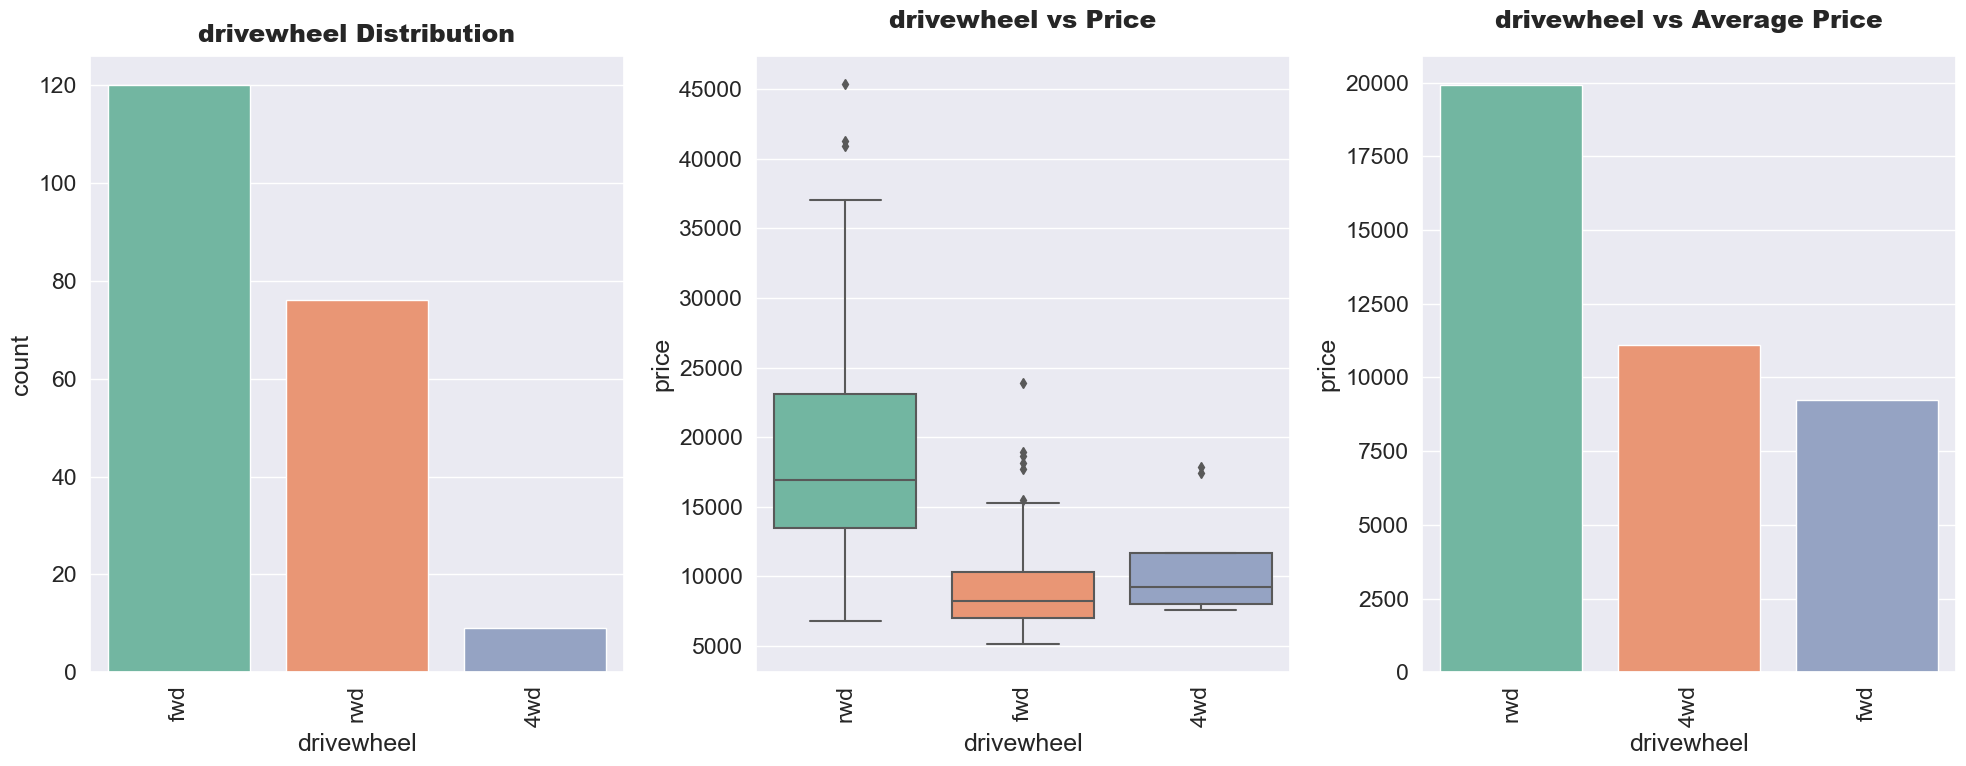

In [34]:
categorical_visualization("drivewheel")

### Observation

1. Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
2. Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

### Insights

1. We can make an insight that the high rated cars must be using Rear Wheel Drive.
2. Cars with low prices must be using Forward Wheel Drive

### 9. Visualizing Engine Location Feature.

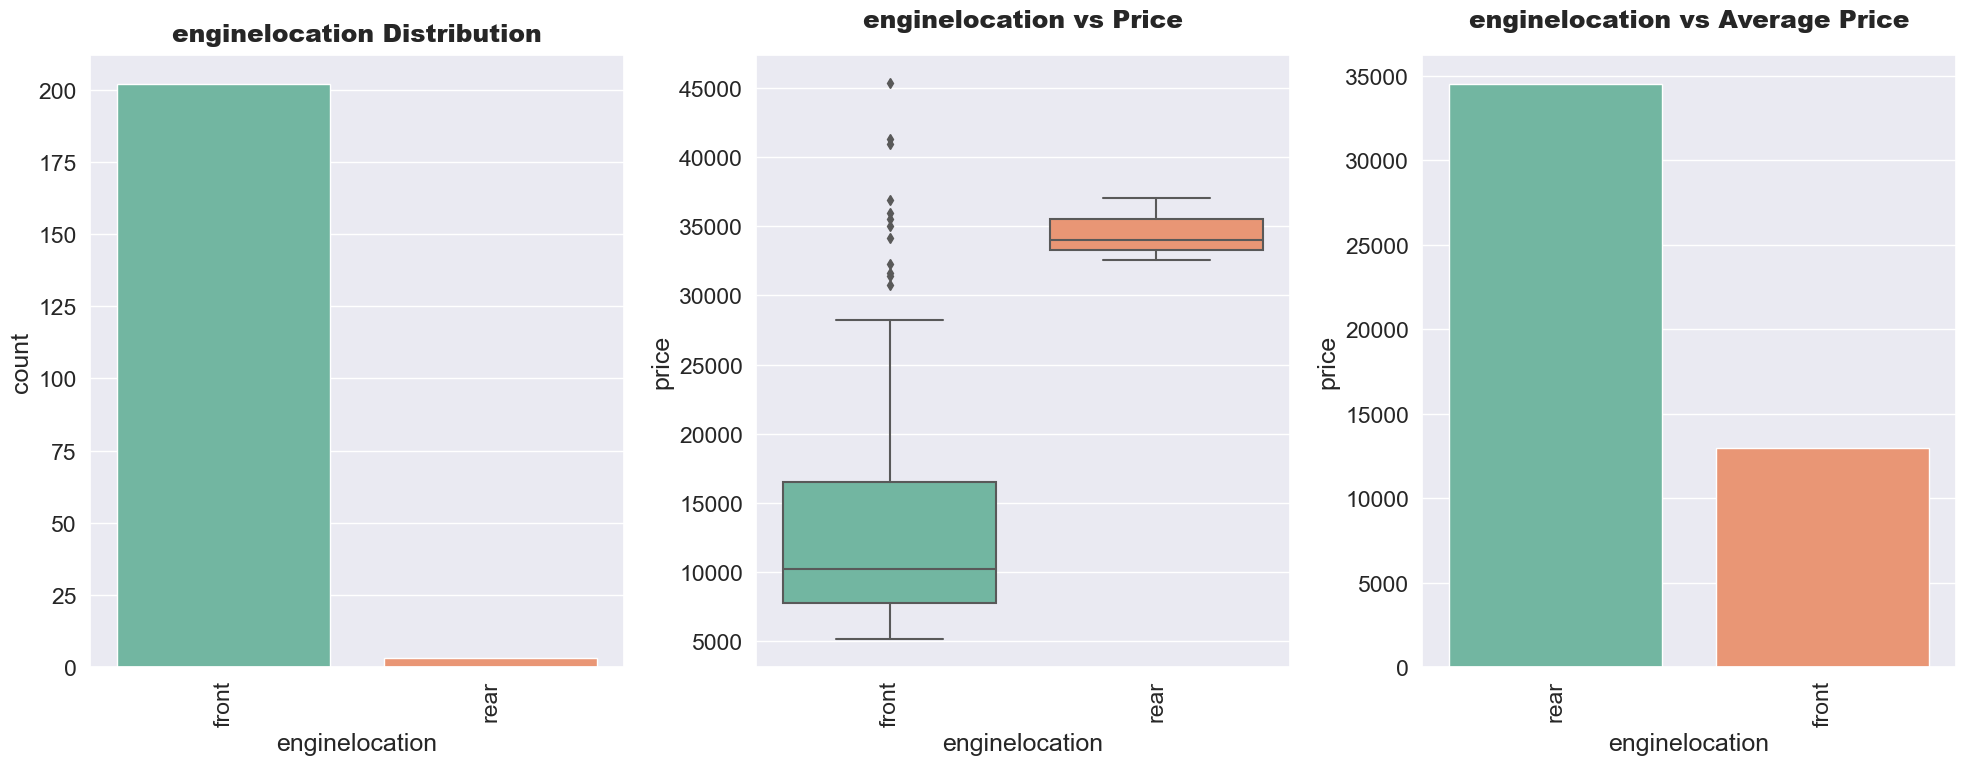

In [35]:
categorical_visualization("enginelocation")

In [36]:
df[df["enginelocation"]=="rear"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porcshce,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


### Observation

1. Most of the cars are having engine location in front.

### Insights

1. Note there are only 3 data-points for the rear category.
2. So we can't make any inference of car price when compared with engine location.
3. If we want we can drop this feature before training as it may lead to overfitting.

### 10. Visualizing Engine Type Feature.

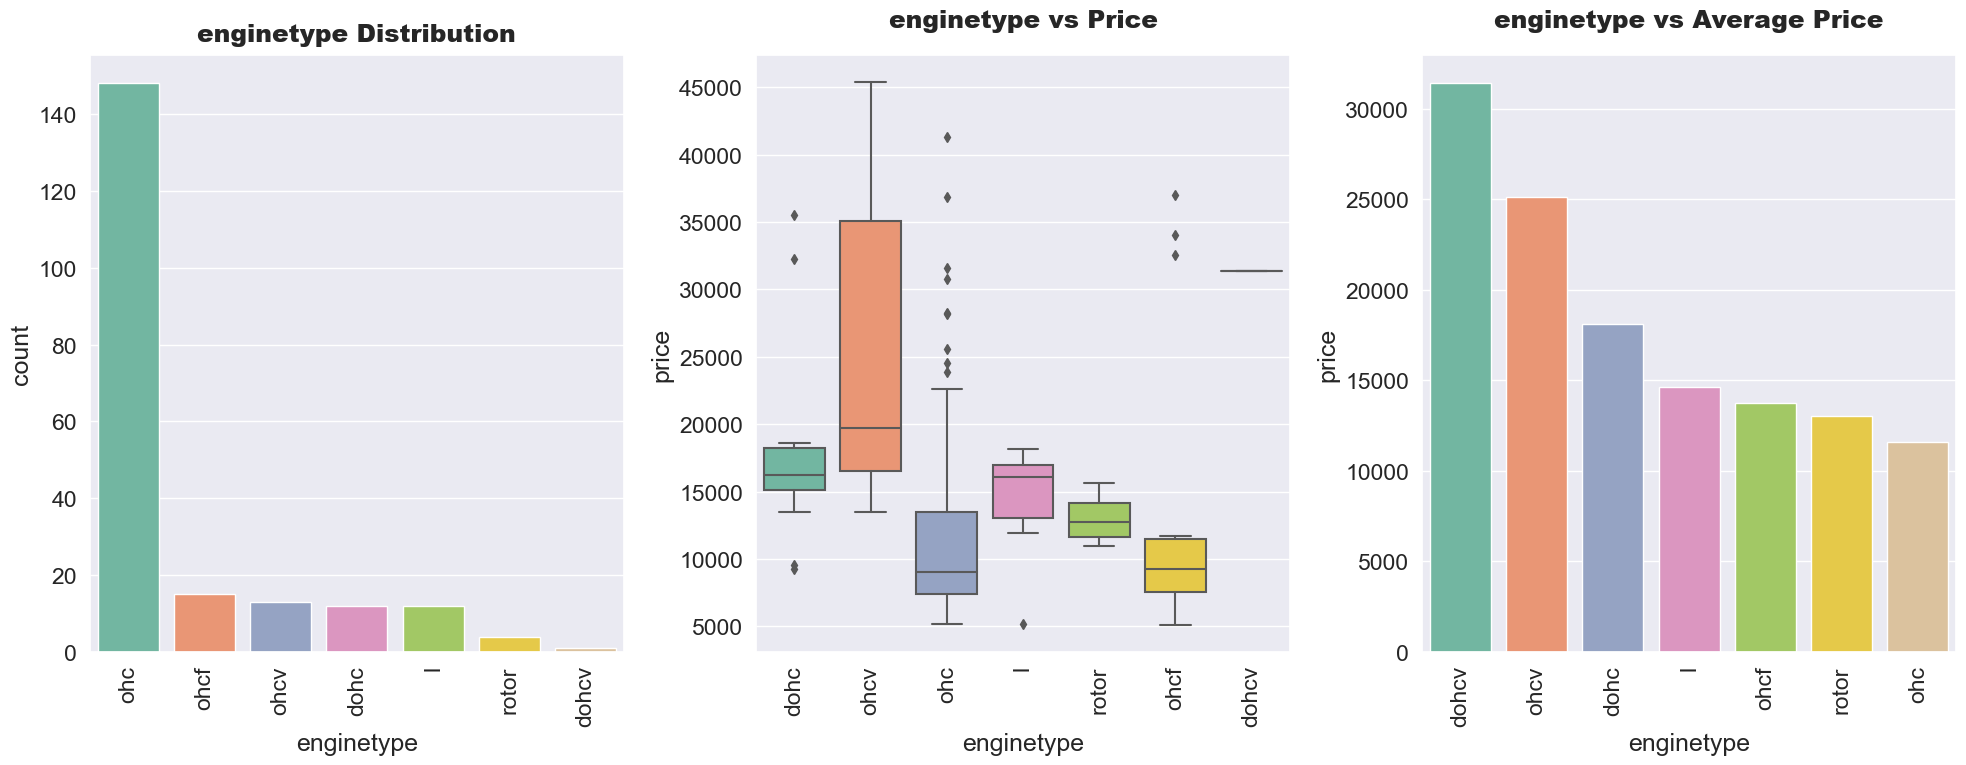

In [37]:
categorical_visualization("enginetype")

In [38]:
df[df["enginetype"]=="dohcv"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [39]:
df[df["enginetype"]=="rotor"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
56,57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
57,58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
58,59,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0


### Insights

1. Cars having Overhead Camshaft (OHC) engines are mostly sold.
2. Only one car has been sold having engine type dohcv.
3. There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
4. Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

### 11. Visualizing Cyclinder Number Feature

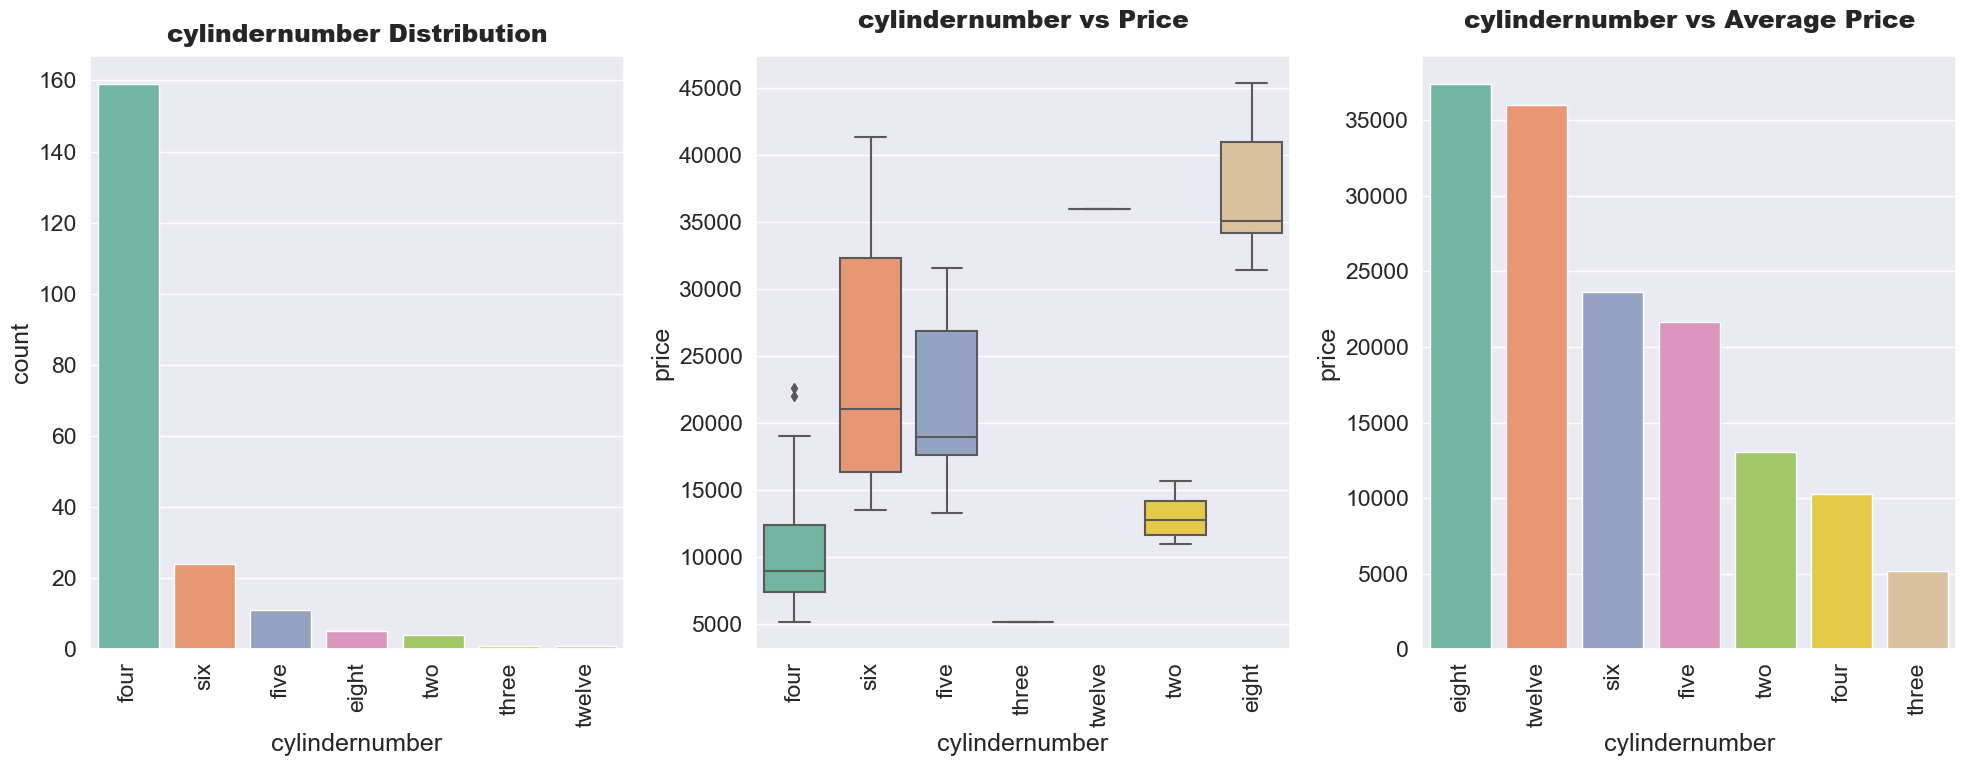

In [40]:
categorical_visualization("cylindernumber")


In [41]:
df[df["cylindernumber"]=="three"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [42]:
df[df["cylindernumber"]=="twelve"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


###  Insights

1. Most of the cars are having Four cyclinders followed by cars having six cyclinders.
2. There are only one data-point each for car having Three & Twelve data-points.
3. Cars having eight cyclinders are most expensive cars followed by six cyclinders. `

### 12. Visualizing Fuel System Feature.

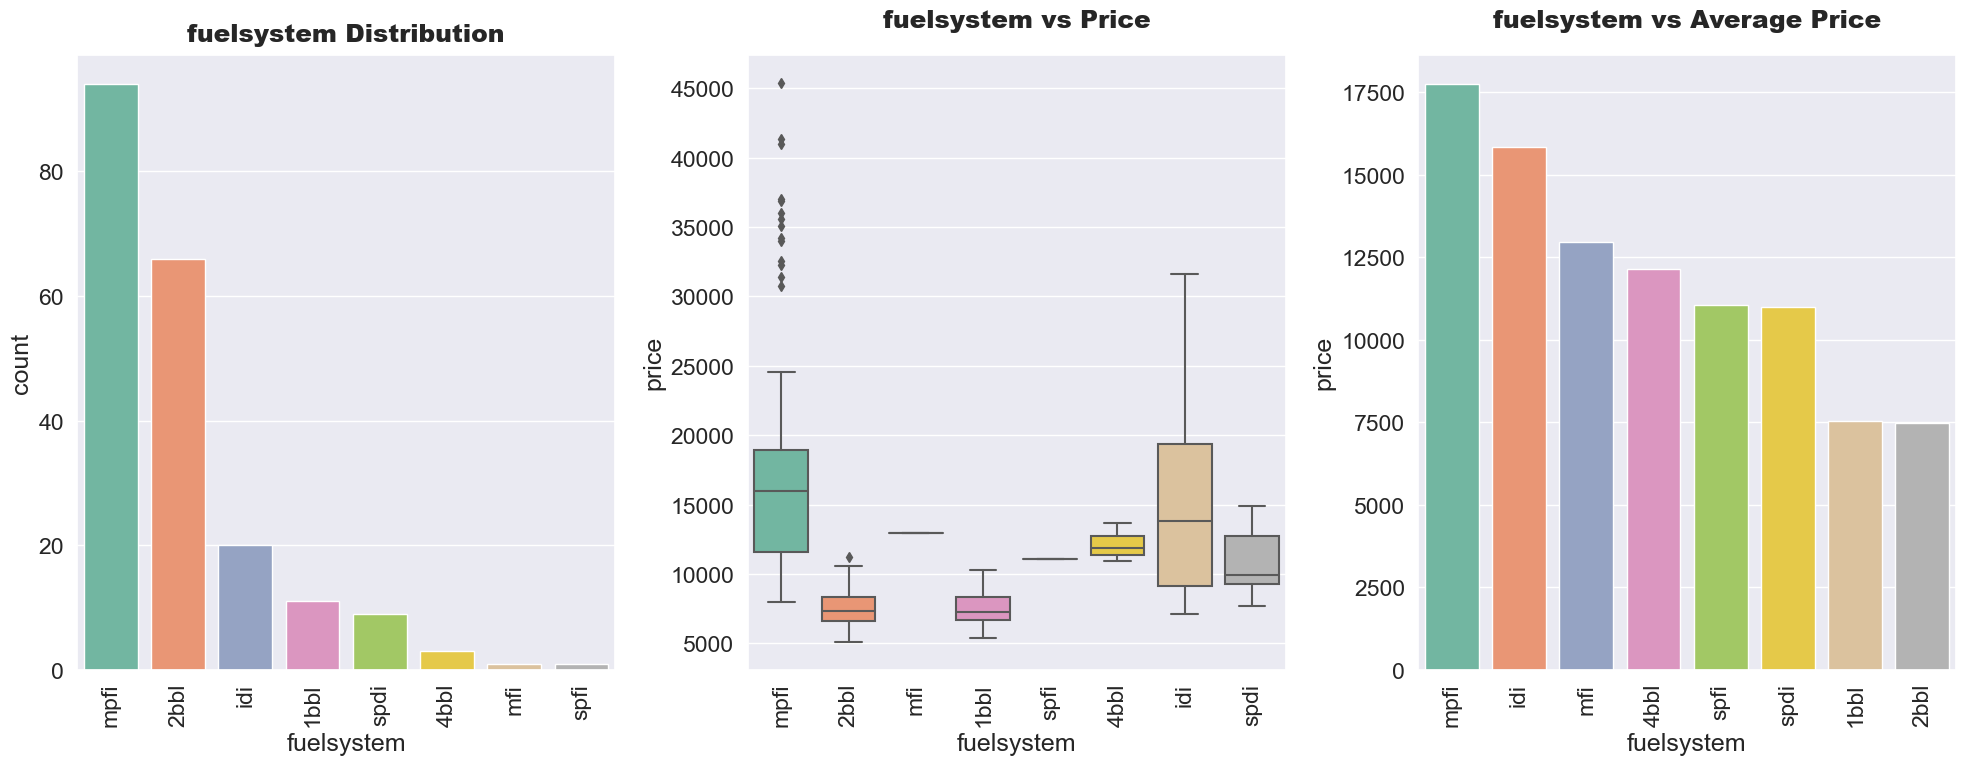

In [43]:
categorical_visualization("fuelsystem")

In [44]:
df[df["fuelsystem"]=="mfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [45]:
df[df["fuelsystem"]=="spfi"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,47,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


### Insight

1. Most of the cars are having mpfi & 2bbl fuelsystems.
2. Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
2. There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

### 13. Visualizing Symboling Feature.

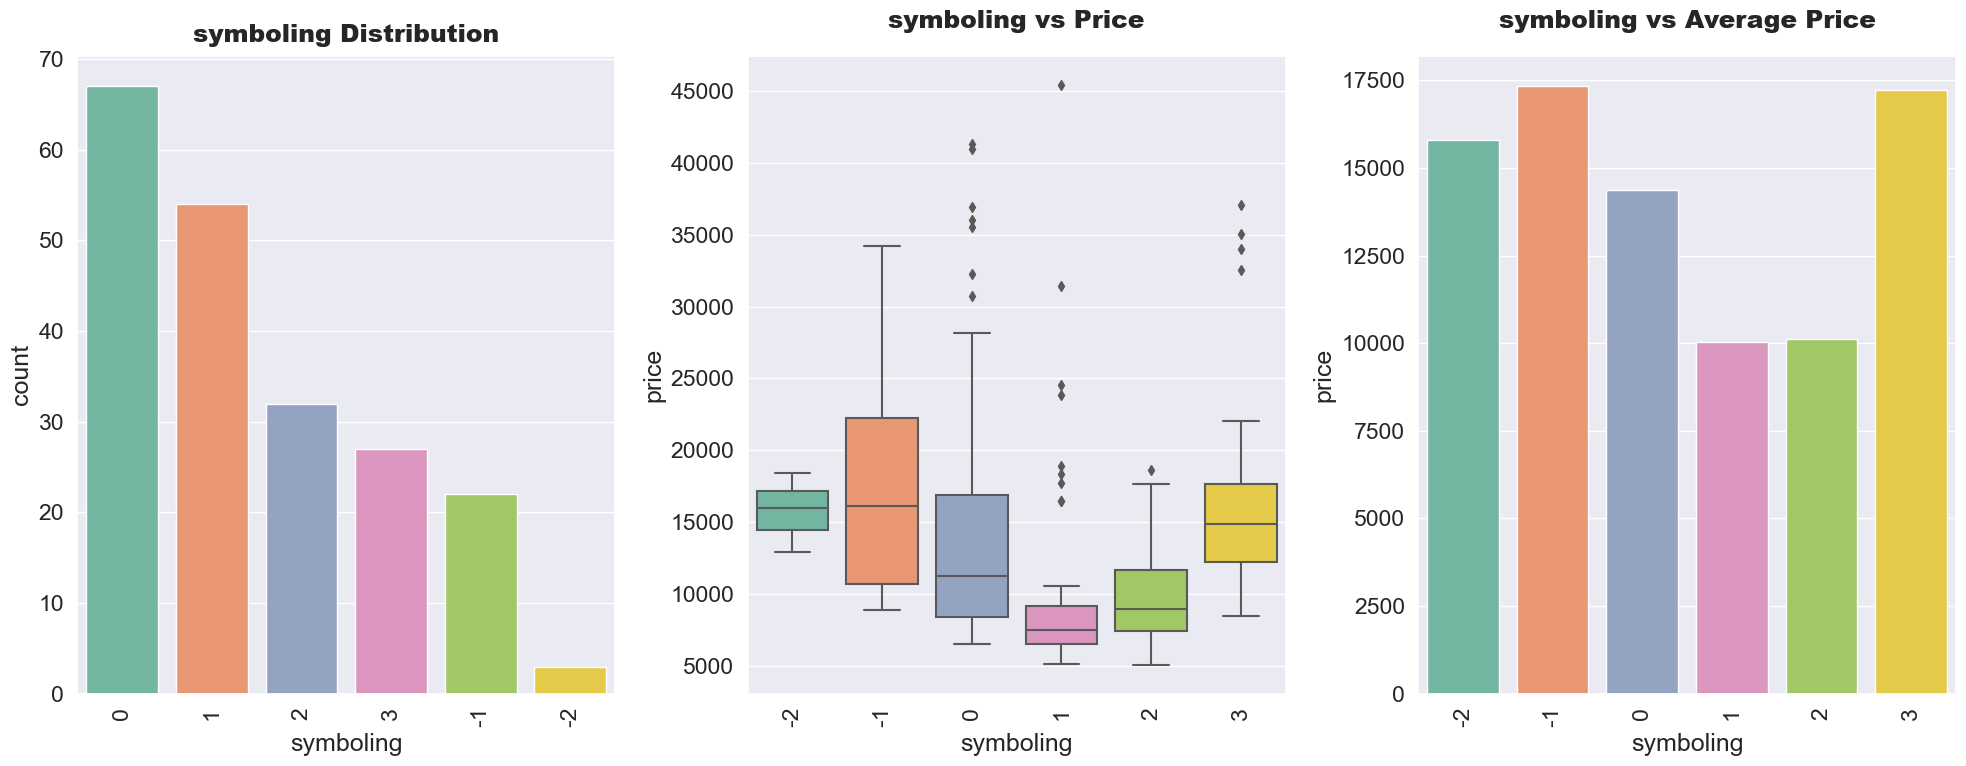

In [46]:
categorical_visualization("symboling")

###
1. The symboling represents the degree to which the car is riskier than its price suggests.
2. It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.
3. In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

### Insights

1. We can clearly observe cars having symboling 0 or 1 are mostly preferred.
2. We can aslo observe that symboling -1, 0, 3 are expensive.

### 14. Visualizing "CarLength", "CarWidth","Carheight" Features w.r.t "Price".

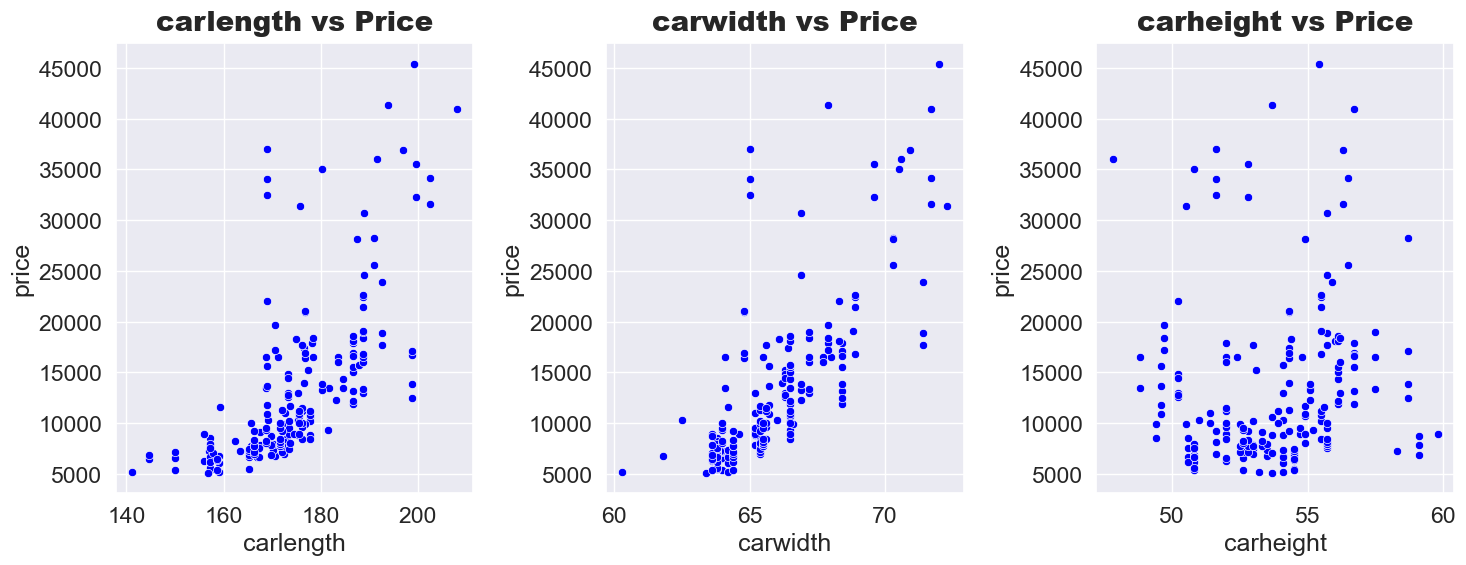

In [47]:
# This code defines a function called scatter_plot that takes a list of column names as its input parameter cols. The function creates a scatter plot for each column in the list, with the car price on the y-axis and the specified column on the x-axis. The function uses the seaborn library to create the scatter plots and sets the color of the data points to blue. It also sets the title of each subplot to "{column name} vs Price", where "column name" is the name of the column being plotted. The title is displayed in a larger font size and bolded. The function uses matplotlib to create a single figure with 3 subplots arranged horizontally. The size of the figure is set to 15 inches by 6 inches, and the subplots are created using the plt.subplot function. The plt.tight_layout() function is called to ensure that the subplots are properly spaced and do not overlap each other. Finally, the function increments the value of x by 1 after each subplot is created to move to the next column in the list.
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1
scatter_plot(["carlength","carwidth","carheight"]) # here i have called column names by giving those list of columns to cols parameter the scatter_plot user defined function

### Insights

1. We can clearly observe that carlength & carwidth features are highly correlated with the price feature.
2. So we can make an insight that with increment in length & width of the car there is an increment in price too.
3. From carlength vs price we can't make any inference as the data-points are too scattered.
4. Since CarHeight is not affecting Price We can drop this feature.

###   15. Visualizing "EngineSize","Boreratio" & "Stroke" Features

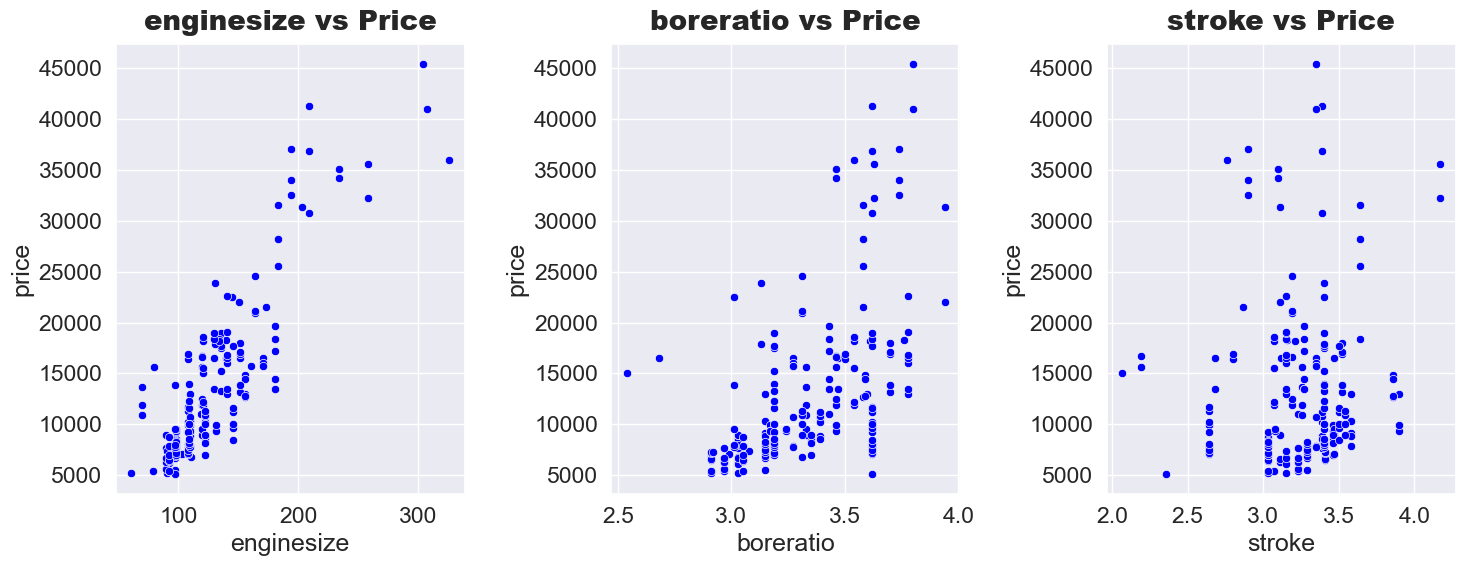

In [48]:
scatter_plot(["enginesize","boreratio","stroke"])

### Insights

1. We can clearly observe that Enginesize is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.
2. From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.
3. From Stroke vs Price we can't make any inference as the data-points are too scattered.
4. Since Stroke is not affecting Price that much. We can drop this feature.

### 16. Visualizing "Compreessionratio","Horesepower" & "Peakrpm" Features.


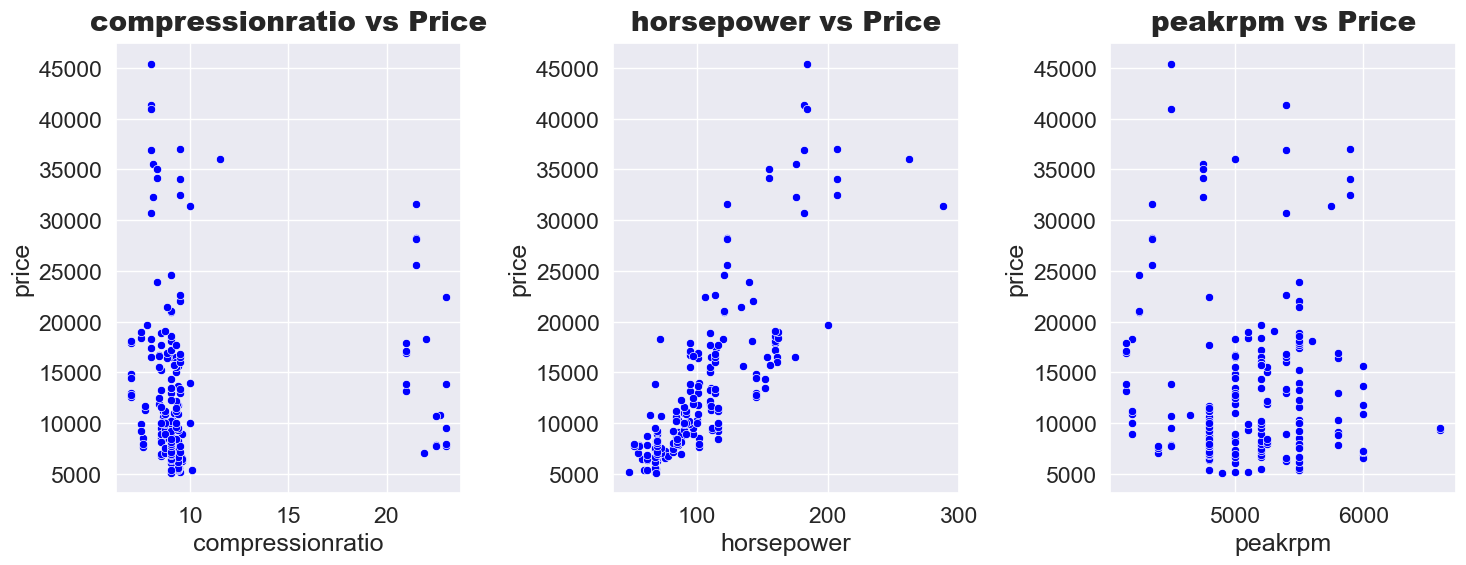

In [49]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

### Inference
1. In this context refers to the process of drawing conclusions or making predictions based on the patterns or trends observed in the scatter plots. When the data points in a scatter plot are too scattered, it can be difficult to identify any clear patterns or trends that would allow for meaningful inference.

2. In other words, if the points in the scatter plot are widely spread out and do not form a clear pattern or trend, it is difficult to make any meaningful conclusions or predictions about the relationship between the two variables being plotted. This is likely the case for the Compressionratio vs Price & Peakrpm vs Price scatter plots mentioned in your question, as the data points are too scattered to identify any clear patterns or trends.

### Insights

1. We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
2. From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.
3. Since Compressionratio & Peakrpm is not affecting price. So we can drop this features.

### 17. Visualizing "WheelBase" & "Curbweight" Features.

In [50]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{cols} vs price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

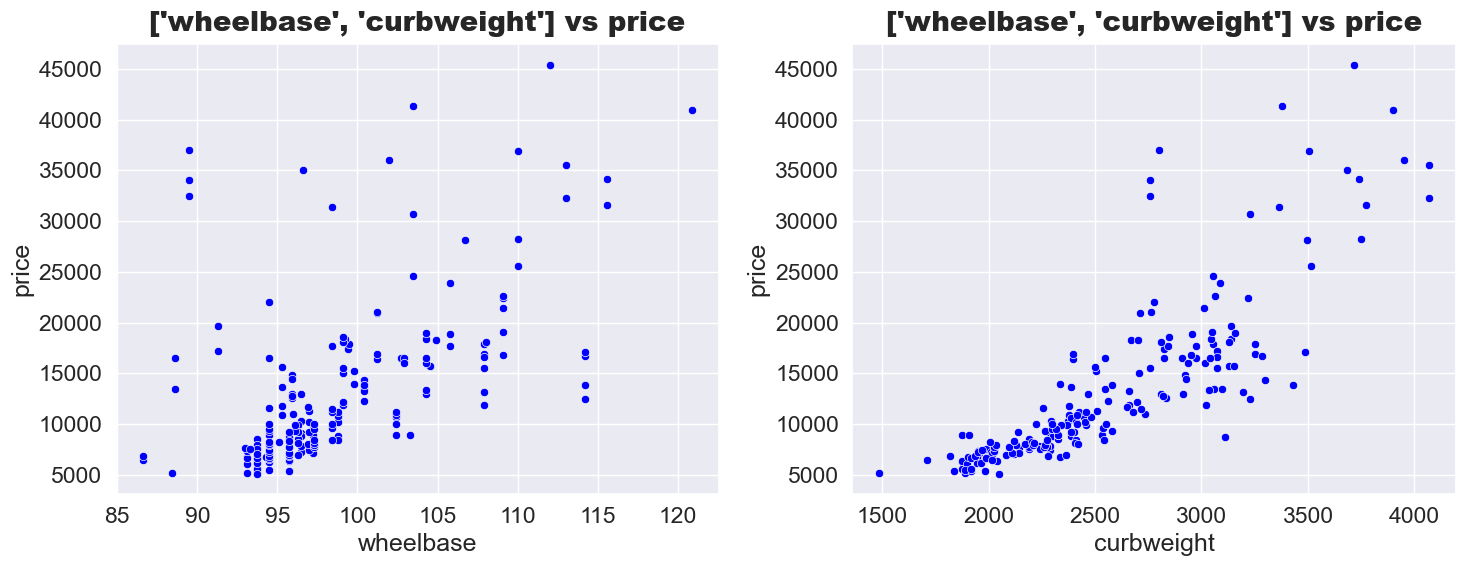

In [51]:
scatter_plot(["wheelbase","curbweight"])

### Insights

1. We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
2. From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.

### 18. Visualizing "Citympg" & "Highwaympg" Features.

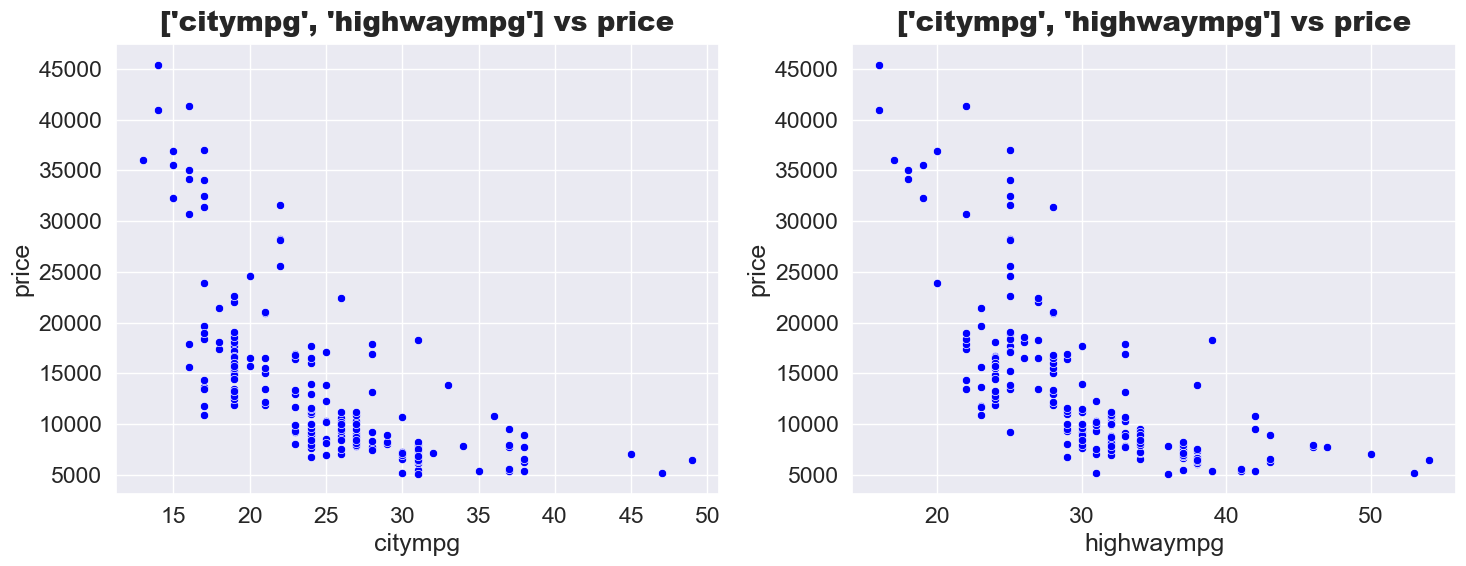

In [52]:
scatter_plot(["citympg","highwaympg"])

### Insights

1. We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
2. So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
3. So our both Citympg & Highwaympg are useful features for price prediction.

### Negative Correlation
1. In statistics, negative correlation (also known as inverse correlation) refers to a relationship between two variables in which one variable increases as the other variable decreases, and vice versa. In other words, as the value of one variable goes up, the value of the other variable goes down. This relationship is often represented graphically as a downward sloping line or curve on a scatter plot.

2. The strength of a negative correlation is measured by a correlation coefficient, which ranges from -1 (perfect negative correlation) to 0 (no correlation) to +1 (perfect positive correlation). A correlation coefficient of -1 indicates a strong negative correlation between the two variables, while a coefficient of 0 indicates no correlation, and a coefficient of +1 indicates a strong positive correlation (where both variables increase or decrease together).

###  18. List of all the useful Features.

####  List of all the useful Categorical Features.

1. CompanyName
2. Fuel Type
3. Aspiration
4. Door Number
5. Car Body
6. Drive Wheel
7. Engine Type
8. Cyclinder Number
9. Fuel System


#### List of all he useful Numerical Features.

1. Wheelbase
2. Carlength
3. Carwidth
4. Curbeweight
5. Enginesize
6. Boreratio
7. Horsepower
8. citympg
9. Highwaympg
10. Price

#### I have included the features which are positive corelated at the same time highly corelated  and i did not included negative corelated features, and features which got too scattered with price feature 

# Feature Engineering

#### 1. Deriving New Features From "Company Name" Feature.
As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.

In [53]:
z=round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z # The code you provided computes the mean price of cars for each unique company name in the "CompanyName" column of the DataFrame df and stores the results in a new DataFrame called z. Here is a step-by-step explanation of what the code does: df.groupby(["CompanyName"]): This groups the rows of the DataFrame df by the values in the "CompanyName" column. This creates a new DataFrameGroupBy object that can be used to perform calculations on each group separately. ["price"].agg(["mean"]): This selects the "price" column from each group and calculates the mean price for each group using the .agg() method with the argument "mean". This creates a new DataFrame with two columns: "price" and "mean", where "price" contains the unique company names and "mean" contains the mean price for each company. .T: This transposes the resulting DataFrame, swapping the rows and columns so that the company names become the column labels and the mean prices become the row values. round(..., 2): This rounds the mean prices to two decimal places using the round() function. z: This assigns the resulting transposed and rounded DataFrame to the variable z. Overall, the code groups the rows of the original DataFrame df by company name, calculates the mean price for each group, and creates a new DataFrame z that contains the mean prices for each company name, rounded to two decimal places. This information could be used to compare the average prices of cars produced by different companies.

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,5645.0,11320.6,16503.0,9239.77,10704.88,15489.09,7963.43,32528.0,31118.62,9595.0,15223.33,8541.25,9696.65,15750.0,7775.0,10175.56,18063.18,10787.5


### Note

1. In above output we fetched the avergae price of each individual car companies
2. Now we have to add this average values a new column in our datset.

In [54]:
# i did transpose to the z variable it means got o/p like below then with the help of the company name as condition iam trying to performe the left join operation which helps us to join the z variable in the dataframe because the company name column get matches in z ,df varibles 
# A=z.T
# A

In [55]:
df=df.merge(z.T,how="left",on="CompanyName")
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,15498.33
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,15498.33
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,15498.33
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,17859.17
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,17859.17
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,17859.17
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,17859.17
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,17859.17
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,17859.17
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,17859.17


In [56]:
bins=[0,10000,20000,40000]
car_bins=["Budget","Medium","Highend"]
df['CarRange']=pd.cut(df['mean'],bins,right=False,labels=car_bins) # The code you provided creates a new categorical column called "CarRange" in the DataFrame df based on the values in the "mean" column. The pd.cut() function is used to bin the values in the "mean" column into three categories - "Budget", "Medium", and "Highend" - based on the specified bin edges. Here is a step-by-step explanation of what the code does: bins=[0,10000,20000,40000]: This creates a list of bin edges that define the boundaries between the three categories. carbins=["Budget","Medium","Highend"]: This creates a list of labels that will be assigned to the three categories defined by the bin edges. pd.cut(df['mean'],bins,right=False,labels=cars_bin): This creates a new categorical column called "CarRange" in the DataFrame df by using the pd.cut() function. The pd.cut() function takes the following arguments: df['mean']: This specifies the column of values to be binned. In this case, the "mean" column of the DataFrame df. bins: This specifies the bin edges to be used for the binning. right=False: This specifies that the bins should be left-inclusive and right-exclusive. This means that the values in the rightmost bin will be included in the bin to the left of it. labels=cars_bin: This specifies the labels to be assigned to the bins. In this case, the list of labels defined earlier. The resulting "CarRange" column contains one of three labels ("Budget", "Medium", or "Highend") for each row in the DataFrame, based on the value in the "mean" column and the specified bin edges and labels. This column can be used to segment the data based on car price range, allowing for further analysis or visualization based on price range.
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


# Data Preprocessing

#### 1. Creating new DataFrame with all the useful Features.

In [57]:
new_df=df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarRange']]

In [58]:
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


### 2. Creating Dummies Variables for all the Categorical Features.

In [59]:
new_df=pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarRange"],data=new_df)# The get_dummies() function in pandas is used to create a new DataFrame with dummy variables for each unique value in a categorical column of the original DataFrame. Here's how it works: You pass the name of a categorical column (or a list of columns) to the get_dummies() function. The function creates a new DataFrame with a new column for each unique value in the categorical column. For each row in the original DataFrame, the value of the corresponding categorical column is replaced with a 1 in the appropriate column of the new DataFrame, and 0s in all other columns.

In [60]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarRange_Budget,CarRange_Medium,CarRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### 3. Feature Scaling of Numerical Data.

#### Feature Scaling of Numerical Data and Explain Standard scaler

1. Feature scaling is a technique used in machine learning to bring all features (columns) of a dataset to a similar scale or range of values. This is done to improve the performance and accuracy of machine learning algorithms by ensuring that no one feature dominates the others due to differences in their scales or units.

2. There are several methods of feature scaling available in scikit-learn library, but one of the most commonly used methods is StandardScaler.

3. StandardScaler is a method of feature scaling that transforms the data such that its distribution has a mean value of 0 and standard deviation of 1. This is done by subtracting the mean of each feature from each observation and dividing by the standard deviation of that feature. The resulting transformed data has a mean of 0 and a standard deviation of 1, which puts all of the features on a common scale.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [62]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']
new_df[num_cols]=scaler.fit_transform(new_df[num_cols]) # The code you provided applies feature scaling to the numerical columns in a DataFrame called new_df using the StandardScaler method from scikit-learn. Here's a step-by-step explanation of what the code does: num_cols is a list of the numerical column names in the new_df DataFrame that we want to scale. scaler is a StandardScaler object that we create to scale the numerical data. scaler.fit_transform(new_df[num_cols]) applies the StandardScaler to the numerical columns specified in num_cols using the .fit_transform() method, which both fits the scaler to the data and transforms the data in a single step. The fit_transform() method computes the mean and standard deviation of the numerical data, and then scales the data by subtracting the mean and dividing by the standard deviation. The resulting scaled data is returned as a NumPy array. The scaled data returned by scaler.fit_transform() is then assigned back to the numerical columns of new_df using the syntax new_df[num_cols] = scaler.fit_transform(new_df[num_cols]). This replaces the original numerical values in the DataFrame with the scaled values.

In [63]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarRange_Budget,CarRange_Medium,CarRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### 4. Selecting Features & Labels for Model Training & Testing.

In [64]:
x=new_df.drop(columns=["price"]) # here iam trying to insert the independednt columns or i/p features to x variable
y=new_df["price"]  # here iam trying to insert the dependednt columns or o/p feature or Target feature to y variable

In [65]:
x.shape

(205, 48)

In [66]:
y.shape

(205,)

### 5. Splitting Data for Model Traning & Testing.

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
print("x_train =",x_train.shape) # x_train contain 164 rows and 48 columns
print("x_test =",x_test.shape) # x_test contain 41 rows and 48 columns
print("y_train =",y_train.shape) # y_train contain 164 rows and 1 columns
print("y_test =",y_test.shape) # y_test contain 41 rows and 1 columns

x_train = (164, 48)
x_test = (41, 48)
y_train = (164,)
y_test = (41,)


## Model Building

In [69]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [71]:
training_score=[]
testing_score=[]

In [72]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred=model.predict(x_train) # can we predict the trained data which is x_train got trained and can we pass the predicted trained dat which is x_train , y train which is not predicted into r2 score Answer  = Yes, you can use the predicted values of the training data (x_train_pred) to compute the R2 score on the training data using the r2_score() function from scikit-learn. The R2 score on the training data will give you an idea of how well the model fits the training data.
    x_test_pred=model.predict(x_test)
    a=r2_score(y_train,x_train_pred)*100
    b=r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    print(f"r2_score of {model} model on Training Data is:",a)
    print(f"r2_score of {model} model on Testing data is:",b)

### 1. Linear-Regression Model

In [73]:
model_prediction(LinearRegression())

r2_score of LinearRegression() model on Training Data is: 95.98943863540174
r2_score of LinearRegression() model on Testing data is: 88.2548498123538


### 2. Decision-Tree-Regressor Model

In [74]:
model_prediction(DecisionTreeRegressor())


r2_score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_score of DecisionTreeRegressor() model on Testing data is: 90.74170208808864


### 3. Random-Forest-Regressor Model

In [75]:
model_prediction(RandomForestRegressor())

r2_score of RandomForestRegressor() model on Training Data is: 98.74758860299494
r2_score of RandomForestRegressor() model on Testing data is: 95.28952559721063


### 5. Ada-Boost-Regressor Model

In [76]:
model_prediction(AdaBoostRegressor())

r2_score of AdaBoostRegressor() model on Training Data is: 96.17340016858492
r2_score of AdaBoostRegressor() model on Testing data is: 90.75697640149471


### 6. Gradient-Boosting-Regressor Model6. Gradient-Boosting-Regressor Model

In [77]:
model_prediction(GradientBoostingRegressor())

r2_score of GradientBoostingRegressor() model on Training Data is: 99.3553888458568
r2_score of GradientBoostingRegressor() model on Testing data is: 92.18973837867613


### 7. LGMB Regressor Model

In [78]:
model_prediction(LGBMRegressor())

r2_score of LGBMRegressor() model on Training Data is: 96.04388858660955
r2_score of LGBMRegressor() model on Testing data is: 88.60953945583863


In [85]:
model_prediction(XGBRegressor())

r2_score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.86531671768431
r2_score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

### 9. Cat-Boost-Regressor Model

In [79]:
model_prediction(CatBoostRegressor(verbose=False))

r2_score of <catboost.core.CatBoostRegressor object at 0x00000193E8B13E50> model on Training Data is: 99.71443876931085
r2_score of <catboost.core.CatBoostRegressor object at 0x00000193E8B13E50> model on Testing data is: 94.08919562568363


## All Model Performance Comparison

In [80]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [87]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [89]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,95.989439,88.254850
1,Decision Tree,99.865371,90.741702
2,Random Forest,98.747589,95.289526
3,Ada Boost,96.173400,90.756976
4,Gradient Boost,99.355389,92.189738
5,LGBM,96.043889,88.609539
6,XGBoost,99.714439,94.089196
7,CatBoost,99.865317,93.088501


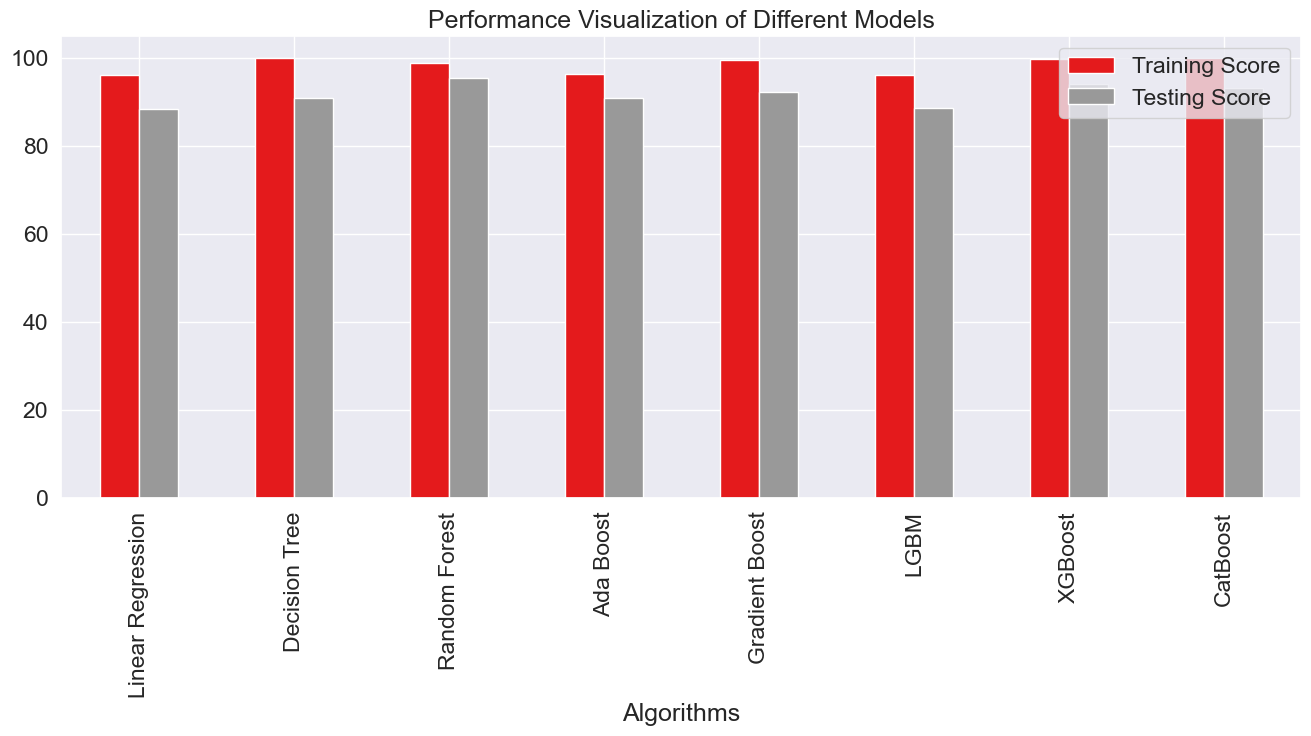

In [92]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"],figsize=(16,6),kind="bar",title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## Observation
1. 💡 Highest performance was give by Random Forest Model around 95%%.
2. 💡 But catboost & XGBoost Model performance was also good.
3. 💡 So we can use any of these three Models for predicting the price of car in future.